# IMPORT LIBRARIES

In [ ]:
# all lib for load, plot and save csv file
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import numpy as np
import os
from datetime import datetime
import joblib # for save and load model
from sklearn.manifold import TSNE # for t-SNE visualization
import warnings
warnings.filterwarnings('ignore')

# all lib for train and test split
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, learning_curve

# all lib for K-NN (classification and regression)
from sklearn.neighbors import KNeighborsClassifier      # for K-NN
from sklearn.pipeline import Pipeline # for pipeline
from sklearn.feature_selection import SelectKBest, f_classif # for feature selection


# all lib for decision tree (classification and regression)
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text        # for Decision Tree
# visualize the decision tree
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree

# all lib for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

# all lib hirarchical clustering
from sklearn.cluster import AgglomerativeClustering      # for Hierarchical Clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage          # for dendrogram visualization

# all lib for evaluation
from sklearn.svm import SVC                             # import Support Vector Machine to draw the decision boundary
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, silhouette_score, calinski_harabasz_score, davies_bouldin_score             # for accuracy score
from sklearn.metrics import precision_score, recall_score, f1_score



# LOAD DATA

In [10]:
# function to load csv file
def load_csv(file):
    data = pd.read_csv(file)
    return data


In [11]:

path = os.getcwd()
# load csv file handled data
classify = path + '/assignTTSWING_cleaned.csv'
# load ./w3classif.csv raw data
# classify = path + '/assignTTSWING.csv'

In [12]:
# because the data don't have header, we need to make the header as row 1 and add the header
classifyData = load_csv(classify)
print(classifyData)

       Unnamed: 0  id        date  testmode  teststage  fileindex  count  \
0               0  10  2019-09-16         0          0          1      1   
1               1  10  2019-09-16         0          0          1      2   
2               2  10  2019-09-16         0          0          1      3   
3               3  10  2019-09-16         0          0          1      4   
4               4  10  2019-09-16         0          0          1      5   
...           ...  ..         ...       ...        ...        ...    ...   
97345       97350  63  2021-01-21         2          0          6     46   
97346       97351  63  2021-01-21         2          0          6     47   
97347       97352  63  2021-01-21         2          0          6     48   
97348       97353  63  2021-01-21         2          0          6     49   
97349       97354  63  2021-01-21         2          0          6     50   

           ax_mean      ay_mean      az_mean  ...   age  playYears  height  \
0       9

In [5]:
# verify the data
print(classifyData.columns) # print the column names

'''
'id', 'date', 'testmode', 'teststage', 'fileindex', 'count', 'ax_mean',
       'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean', 'ax_var',
       'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'ax_rms', 'ay_rms',
       'az_rms', 'gx_rms', 'gy_rms', 'gz_rms', 'a_max', 'a_mean', 'a_min',
       'g_max', 'g_mean', 'g_min', 'a_fft', 'g_fft', 'a_psdx', 'g_psdx',
       'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy',
       'gender', 'age', 'playYears', 'height', 'weight', 'handedness',
       'holdRacketHanded', 'newv1', 'newv2', 'newv3', 'newv4'
'''
# describe the data: excluding id, date/ show how many different testmode, teststage, fileindex / show max, mean, min of non categorical data
# write the data to a excel file
classifyData.describe(include='all').to_excel('classifyData.xlsx', index=False)

Index(['id', 'date', 'testmode', 'teststage', 'fileindex', 'count', 'ax_mean',
       'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean', 'ax_var',
       'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'ax_rms', 'ay_rms',
       'az_rms', 'gx_rms', 'gy_rms', 'gz_rms', 'a_max', 'a_mean', 'a_min',
       'g_max', 'g_mean', 'g_min', 'a_fft', 'g_fft', 'a_psdx', 'g_psdx',
       'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy',
       'gender', 'age', 'playYears', 'height', 'weight', 'handedness',
       'holdRacketHanded', 'newv1', 'newv2', 'newv3', 'newv4'],
      dtype='object')


In [5]:
# print the type of each column
print(classifyData.dtypes)

Unnamed: 0            int64
id                    int64
date                 object
testmode              int64
teststage             int64
fileindex             int64
count                 int64
ax_mean             float64
ay_mean             float64
az_mean             float64
gx_mean             float64
gy_mean             float64
gz_mean             float64
ax_var              float64
ay_var              float64
az_var              float64
gx_var              float64
gy_var              float64
gz_var              float64
ax_rms              float64
ay_rms              float64
az_rms              float64
gx_rms              float64
gy_rms              float64
gz_rms              float64
a_max               float64
a_mean              float64
a_min               float64
g_max               float64
g_mean              float64
g_min               float64
a_fft               float64
g_fft               float64
a_psdx              float64
g_psdx              float64
a_kurt              

In [13]:
# convert string to category for categorical data ( without date)
# for col in classifyData.columns:
#     # if the column is date, convert to datetime
#     if classifyData[col].dtype == 'object':
#         classifyData[col] = classifyData[col].astype('category').cat.codes
#     else:
#         print(f'{col} is not a categorical data')

# # check the data type of each column
# print(classifyData.dtypes)

# convert date to datetime example input:16/09/2019 or 5/10/2019 day/month/year separated by /
classifyData['date'] = pd.to_datetime(classifyData['date'], format='%d/%m/%Y', errors='coerce')


# check the data type date
print("data type of date: ", classifyData['date'].dtype)

# print range of date
print("date range: ", classifyData['date'].min(), " to ", classifyData['date'].max())


data type of date:  datetime64[ns]
date range:  NaT  to  NaT


# DATA CLEANING

In [8]:
cleanedData = classifyData.copy() # make a copy of the cleaned dat

# check for faulty data (??? values)
while cleanedData.isin(['???']).any().any():
    print("Faulty data found in the data")
    # print the faulty data
    print(cleanedData[cleanedData.isin(['???']).any(axis=1)]) # axis=1 means check row by row
    # print faulty data to excel file
    #cleanedData[cleanedData.isin(['???']).any(axis=1)].to_excel('faultyData.xlsx', index=False)
    cleanedData = cleanedData.replace('???', np.nan) # replace the faulty data with NaN
    print("Faulty data removed")

# check for missing values (NaN)
while cleanedData.isnull().values.any():
    print("Missing values found in the data")
    # print the missing values
    print(cleanedData[cleanedData.isnull().any(axis=1)]) # axis=1 means check row by row
    # print missing values to excel file
    # cleanedData[cleanedData.isnull().any(axis=1)].to_excel('missingValues.xlsx', index=False)
    cleanedData = cleanedData.dropna() # drop the rows with missing values
    print("Missing values removed")    
    
# check for duplicate values
while cleanedData.duplicated().any():
    print("Duplicate values found in the data")
    
    # print duplicate values to excel file
    #cleanedData[cleanedData.duplicated()].to_excel('duplicateValues.xlsx', index=False)    
    print(cleanedData[cleanedData.duplicated()])

    cleanedData = cleanedData.drop_duplicates() # drop the duplicate values
    print("Duplicate values removed")
    

    if cleanedData.duplicated().any():
        print("Some duplicates still remain after removal.")
                


Faulty data found in the data
       id date  testmode  teststage  fileindex  count  ax_mean  ay_mean  \
9999    0  NaT         0          0          0      0      0.0      0.0   
19999   0  NaT         0          0          0      0      0.0      0.0   
29999   0  NaT         0          0          0      0      0.0      0.0   
39999   0  NaT         0          0          0      0      0.0      0.0   
49999   0  NaT         0          0          0      0      0.0      0.0   

       az_mean  gx_mean  ...  age  playYears  height  weight  handedness  \
9999       0.0      0.0  ...  ???        ???     ???     ???           0   
19999      0.0      0.0  ...  ???        ???     ???     ???           0   
29999      0.0      0.0  ...  ???        ???     ???     ???           0   
39999      0.0      0.0  ...  ???        ???     ???     ???           0   
49999      0.0      0.0  ...  ???        ???     ???     ???           0   

       holdRacketHanded  newv1  newv2  newv3  newv4  
9999    

In [9]:
# print the length of all distinct values of id (highest id, lowest id, number of distinct values)
print("Highest id: ", cleanedData['id'].max())
print("Lowest id: ", cleanedData['id'].min())
print("Number of distinct values of id: ", len(cleanedData['id'].unique()))
    
# for each player in the same date, testmode, teststage, fileindex
# check if the count of all rows are == 50, if not, create a different id (from the highest) for the second group of "count" > 50  and change the id of the second group to the new id
# if the second id created for existing id, if that same player but different date, testmode, teststage, fileindex happened again -> don't create a new id but use created id instead
# such that the maximum id = 2*current highest id
groupedData = cleanedData.groupby(['id', 'date', 'testmode', 'teststage', 'fileindex'])
# add a new column "newid" to the grouped data as a boolean value, if newid != -1, then use it.
groupedData = groupedData.apply(lambda x: x.assign(newid=-1))
# print the number of groups
print("Number of groups: ", len(groupedData))

Highest id:  92
Lowest id:  0
Number of distinct values of id:  93
Number of groups:  97350


In [10]:
# Print the length of all distinct values of id
print("Highest id: ", cleanedData['id'].max())
print("Lowest id: ", cleanedData['id'].min())
print("Number of distinct values of id: ", len(cleanedData['id'].unique()))

# Add a new column "newid" to the data, initialize with original id values
cleanedData['newid'] = cleanedData['id']

# Get the maximum current ID to calculate new IDs
max_id = cleanedData['id'].max()

# Dictionary to store new IDs for players that have been split
split_players = {}

# Group by the identifying columns
groups = cleanedData.groupby(['id', 'date', 'testmode', 'teststage', 'fileindex'])

# For each group, check if count exceeds 50 and split if needed
for name, group in groups:
    player_id = name[0]  # The id is the first element in the group key
    
    if len(group) > 50:
        # This group has more than 50 rows, need to split
        
        # Create a key for this specific player session
        player_key = (player_id, name[1], name[2], name[3], name[4])  # id, date, testmode, teststage, fileindex
        
        # Check if we've already assigned a new ID for this player
        if player_id in split_players:
            new_id = split_players[player_id]
        else:
            # Create a new ID for this player's second group
            new_id = max_id + player_id  # This ensures new_id ≤ 2*max_id
            split_players[player_id] = new_id
        
        # Get the indices of the second half of the data (after the first 50 rows)
        second_half_indices = group.iloc[50:].index
        
        # Assign the new ID to the second half
        cleanedData.loc[second_half_indices, 'newid'] = new_id
        
        print(f"Split player {player_id}: first 50 rows keep ID {player_id}, next {len(group) - 50} rows get new ID {new_id}")

# Print summary of changes
print(f"\nResults after splitting:")
print(f"Original highest ID: {max_id}")
print(f"New highest ID: {cleanedData['newid'].max()}")
print(f"Number of split players: {len(split_players)}")
print(f"Number of distinct values in newid: {len(cleanedData['newid'].unique())}")

# Optional: To use the new IDs going forward, you can replace the old ID column
cleanedData['id'] = cleanedData['newid']
cleanedData.drop(columns=['newid'], inplace=True)

Highest id:  92
Lowest id:  0
Number of distinct values of id:  93
Split player 6: first 50 rows keep ID 6, next 50 rows get new ID 98
Split player 6: first 50 rows keep ID 6, next 50 rows get new ID 98
Split player 6: first 50 rows keep ID 6, next 50 rows get new ID 98
Split player 6: first 50 rows keep ID 6, next 50 rows get new ID 98
Split player 6: first 50 rows keep ID 6, next 50 rows get new ID 98
Split player 6: first 50 rows keep ID 6, next 50 rows get new ID 98
Split player 6: first 50 rows keep ID 6, next 50 rows get new ID 98
Split player 6: first 50 rows keep ID 6, next 50 rows get new ID 98
Split player 6: first 50 rows keep ID 6, next 50 rows get new ID 98
Split player 6: first 50 rows keep ID 6, next 50 rows get new ID 98
Split player 10: first 50 rows keep ID 10, next 50 rows get new ID 102
Split player 12: first 50 rows keep ID 12, next 50 rows get new ID 104
Split player 12: first 50 rows keep ID 12, next 50 rows get new ID 104
Split player 12: first 50 rows keep ID 1

In [ ]:
def standardize_data(data):
	# Standardize the data
	scaler = StandardScaler()
	scaled_data = scaler.fit_transform(data)
	return scaled_data, scaler

In [ ]:
# standardize the data
#cleanedData = cleanedData.drop(columns=['id', 'date', 'testmode', 'teststage', 'fileindex', 'count']) # drop the columns that are not needed
cleanedData = standardize_data(cleanedData['ax_mean':'g_entropy']) # standardize the data

In [11]:
# save the cleaned data to a csv file
cleanedData.to_csv('assignTTSWING_cleaned.csv')

In [12]:
# for each player in a same day, testmode, teststage, fileindex -------- this code run take ~ 3 minutes -> ensure that max count = 50
# if max count != 50, remove the player from the data

# for i in range(len(cleanedData)):
#     # get the player id, date, testmode, teststage, fileindex
#     playerId = cleanedData.iloc[i]['id']
#     date = cleanedData.iloc[i]['date']
#     testmode = cleanedData.iloc[i]['testmode']
#     teststage = cleanedData.iloc[i]['teststage']
#     fileindex = cleanedData.iloc[i]['fileindex']
    
#     # get the count of the player in the same day, testmode, teststage, fileindex
#     count = cleanedData[(cleanedData['id'] == playerId) & (cleanedData['date'] == date) & (cleanedData['testmode'] == testmode) & (cleanedData['teststage'] == teststage) & (cleanedData['fileindex'] == fileindex)]['count'].max()
    
#     # if count != 50, remove the player from the data
#     if count != 50:
#         cleanedData = cleanedData[~((cleanedData['id'] == playerId) & (cleanedData['date'] == date) & (cleanedData['testmode'] == testmode) & (cleanedData['teststage'] == teststage) & (cleanedData['fileindex'] == fileindex))]
#         print("Player removed from the data: ", playerId, date, testmode, teststage, fileindex)
        
        
# # print remain # of rows
# print("Number of rows after cleaning: ", cleanedData.shape[0])

# PERFORM EDA (Exploratory Data Analysis)

In [13]:
'''
Index(['id', 'date', 'testmode', 'teststage', 'fileindex', 'count', 'ax_mean',
       'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean', 'ax_var',
       'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'ax_rms', 'ay_rms',
       'az_rms', 'gx_rms', 'gy_rms', 'gz_rms', 'a_max', 'a_mean', 'a_min',
       'g_max', 'g_mean', 'g_min', 'a_fft', 'g_fft', 'a_psdx', 'g_psdx',
       'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy',
       'gender', 'age', 'playYears', 'height', 'weight', 'handedness',
       'holdRacketHanded', 'newv1', 'newv2', 'newv3', 'newv4'],
      dtype='object')
                 id      testmode     teststage     fileindex        count  \
count  97355.000000  97355.000000  97355.000000  97355.000000  97355.00000   
mean      43.843665      1.087258      1.238765      3.539623     25.49869   
std       27.208801      0.483554      0.953469      2.930125     14.43173   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%       20.000000      1.000000      1.000000      1.000000     13.00000   
50%       46.000000      1.000000      1.000000      3.000000     25.00000   
75%       66.000000      1.000000      2.000000      5.000000     38.00000   
max       92.000000      2.000000      3.000000     26.000000     50.00000   

            ax_mean       ay_mean       az_mean       gx_mean       gy_mean  \
count  97355.000000  97355.000000  97355.000000  97355.000000  97355.000000   
mean   -2921.404897   -218.352881  -1640.993621    817.979526    -77.558540   
std     2845.664593   3992.006605   1479.344409   1438.056696   1495.197333   
min   -25557.500000 -16872.000000 -10112.400000 -16558.250000 -17013.000000   
25%    -3738.082608  -3225.757757  -2787.445906    226.766304  -1069.691464   
50%    -2709.500000   -465.894737  -1922.388889   1027.775510    239.688889   
75%    -1716.295918   2777.439946   -641.591848   1620.680373    831.333522   
max    15096.470590  25487.333330  11210.000000  15170.333330  18125.333330   

       ...       g_skewn     a_entropy     g_entropy        gender  \
count  ...  97355.000000  97355.000000  97355.000000  97355.000000   
mean   ...     38.903424     -3.020282     -3.017610      0.603975   
std    ...     31.933707      0.582751      0.582385      0.489072   
min    ...    -69.167519     -5.064161     -5.078669      0.000000   
25%    ...     13.126988     -3.568395     -3.566340      0.000000   
50%    ...     38.271206     -2.938864     -2.931517      1.000000   
75%    ...     61.678661     -2.836737     -2.838172      1.000000   
max    ...    478.611435      0.000000      0.000000      1.000000   

         handedness  holdRacketHanded         newv1         newv2  \
count  97355.000000      97355.000000  97355.000000  97355.000000   
mean       0.834574          0.834574  -2922.797810   -209.864418   
std        0.371566          0.371566   2845.599252  20005.067679   
min        0.000000          0.000000 -16335.369190 -94104.184950   
25%        1.000000          1.000000  -4844.246042 -13692.341815   
50%        1.000000          1.000000  -2919.055189   -144.614468   
75%        1.000000          1.000000   -991.330255  13191.052745   
max        1.000000          1.000000  10906.689750  88867.512180   

              newv3         newv4  
count  97355.000000  97355.000000  
mean   -1641.293755     32.058723  
std      148.319219     18.194006  
min    -2332.549823      0.000000  
25%    -1740.657448     16.000000  
50%    -1641.301354     32.000000  
75%    -1542.219637     48.000000  
max        0.000000     63.000000 
'''

"\nIndex(['id', 'date', 'testmode', 'teststage', 'fileindex', 'count', 'ax_mean',\n       'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean', 'ax_var',\n       'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'ax_rms', 'ay_rms',\n       'az_rms', 'gx_rms', 'gy_rms', 'gz_rms', 'a_max', 'a_mean', 'a_min',\n       'g_max', 'g_mean', 'g_min', 'a_fft', 'g_fft', 'a_psdx', 'g_psdx',\n       'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy',\n       'gender', 'age', 'playYears', 'height', 'weight', 'handedness',\n       'holdRacketHanded', 'newv1', 'newv2', 'newv3', 'newv4'],\n      dtype='object')\n                 id      testmode     teststage     fileindex        count  count  97355.000000  97355.000000  97355.000000  97355.000000  97355.00000   \nmean      43.843665      1.087258      1.238765      3.539623     25.49869   \nstd       27.208801      0.483554      0.953469      2.930125     14.43173   \nmin        0.000000      0.000000      0.000000      0.000000      

In [14]:
# 1) Taller players may generate different accelerometer/gyroscope patterns due to longer limb reach and arc. 
# -> height classification (3 classes: short (<170cm), medium (170-180cm), tall (>180cm))
# 2) Body mass may influence swing strength and movement speed.
# -> weight classification (3 classes: light (<60kg), medium (60-80kg), heavy (>80kg))
# 3) Age may affect swing speed and strength.
# -> age classification (3 classes: young (<20), middle-aged (20-40), old (>40))
# 4) different kurtosis and skewness (e.g., a_kurt, g_kurt, a_skewn, g_skewn) may indicate different swing patterns and identify strange or faulty swings.
# -> kurtosis classification (3 classes: low (<0), medium (0-1), high (>1))

## Distribution of the target variables

In [29]:
# print distict values of height, weight, age, kurtosis
print("height: ", cleanedData['height'].unique()) # print the unique values of height
print("weight: ", cleanedData['weight'].unique()) # print the unique values of weight
print ("age: ", cleanedData['age'].unique()) # print the unique values of age

NameError: name 'cleanedData' is not defined

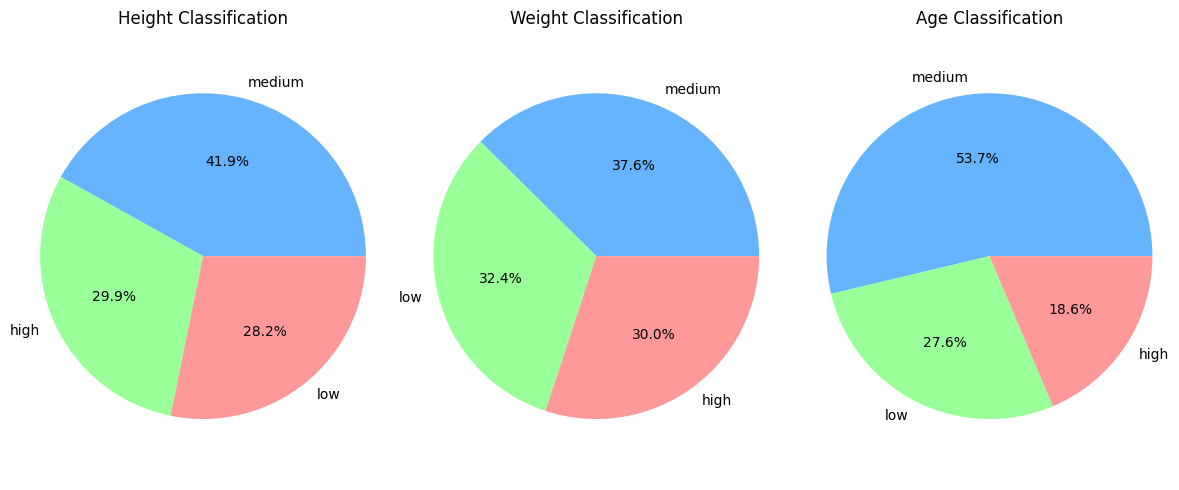

In [ ]:
# use pie plot to show the if the data is balance (height, weight, age - with values 1,2,3 represents high/medium/low)

# Count categories
counts = cleanedData['height'].value_counts()
weight_counts = cleanedData['weight'].value_counts()
age_counts = cleanedData['age'].value_counts()
# Define consistent color palette
colors = ['#66b3ff', '#99ff99', '#ff9999']  # Can be adjusted

# Plot height
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Height Classification')
plt.axis('equal')

# Plot weight
plt.subplot(1, 3, 2)
plt.pie(weight_counts, labels=weight_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Weight Classification')
plt.axis('equal')

# Plot age
plt.subplot(1, 3, 3)
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Age Classification')
plt.axis('equal')

plt.tight_layout()
plt.show()

## Correlation of the target variables with the features

BMI = weight / (height ** 2)


In [17]:
def plot_scatter(data, x, y, z, title, target='height'):
    from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # If the target is categorical, convert to numeric labels
    if data[target].dtype == 'object':
        categories = data[target].unique()
        cat_to_num = {cat: idx for idx, cat in enumerate(sorted(categories))}
        color_values = data[target].map(cat_to_num)
    else:
        color_values = data[target]

    # Plot the data
    scatter = ax.scatter(data[x], data[y], data[z],
                         c=color_values, cmap='viridis', marker='o')

    ax.set_xlabel(x, fontsize=10, labelpad=10)
    ax.set_ylabel(y, fontsize=10, labelpad=10)
    ax.set_zlabel(z, fontsize=10, labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=9)
    ax.set_title(title, fontsize=12, pad=20)

    # Add color bar with correct labels
    cbar = fig.colorbar(scatter, ax=ax, shrink=0.6)
    cbar.set_label(target, fontsize=10)
    if data[target].dtype == 'object':
        cbar.set_ticks(list(cat_to_num.values()))
        cbar.set_ticklabels(list(cat_to_num.keys()))
    cbar.ax.tick_params(labelsize=8)

    plt.tight_layout()
    plt.savefig(f'{title}.png', dpi=300, bbox_inches='tight')
    plt.show()

# uncomment the following lines to plot the scatter plot for height, weight, age classification

# plot_scatter(classifyData, 'ax_mean', 'ay_mean', 'az_mean', 'Height Classification with ax_mean, ay_mean, az_mean', target='height')
# plot_scatter(classifyData, 'gx_mean', 'gy_mean', 'gz_mean', 'Height Classification with gx_mean, gy_mean, gz_mean', target='height')
# plot_scatter(classifyData, 'ax_mean', 'ay_mean', 'az_mean', 'Weight Classification with ax_mean, ay_mean, az_mean', target='weight')
# plot_scatter(classifyData, 'gx_mean', 'gy_mean', 'gz_mean', 'Weight Classification with gx_mean, gy_mean, gz_mean', target='weight')
# plot_scatter(classifyData, 'ax_mean', 'ay_mean', 'az_mean', 'Age Classification with ax_mean, ay_mean, az_mean', target='age')
# plot_scatter(classifyData, 'gx_mean', 'gy_mean', 'gz_mean', 'Age Classification with gx_mean, gy_mean, gz_mean', target='age')


In [19]:
# plot accelerometer data (ax_mean, ay_mean, az_mean) based on count and
plotdata = cleanedData.copy() # make a copy of the plotdata
plotdata = plotdata[['id','date', 'testmode', 'teststage', 'fileindex', 'count', 'handedness', 'holdRacketHanded', 'ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean']] # select the columns to plot

# print distinct values of date and testmode
print("Distinct values of id: ", plotdata['id'].unique())
print("Distinct values of date: ", plotdata['date'].unique())
print("Distinct values of testmode: ", plotdata['testmode'].unique())
print("Distinct values of teststage: ", plotdata['teststage'].unique())
print("Distinct values of fileindex: ", plotdata['fileindex'].unique())
print("Distinct values of count: ", plotdata['count'].unique())
print("Distinct values of handedness: ", plotdata['handedness'].unique())
print("Distinct values of holdRacketHanded: ", plotdata['holdRacketHanded'].unique())

# testmode = 0, teststage = 0, fileindex = 0, date = 2020-02-18 00:00:00
# filter the data based on testmode, teststage, fileindex, date, handedness and holdRacketHanded
plotdata = plotdata[(plotdata['testmode'] == 0) & (plotdata['teststage'] == 0) 
                    & (plotdata['fileindex'] == 1) & (plotdata['date'] == '2020-02-18 00:00:00') 
                    & (plotdata['handedness'] == 1) & (plotdata['holdRacketHanded'] == 1)] 

plotdata = plotdata.dropna() # drop the rows with missing values
plotdata = plotdata.drop_duplicates() # drop the duplicate values
plotdata = plotdata.reset_index(drop=True) # reset the index

# print the shape of the plotdata
print("Shape of the cleanedData: ", cleanedData.shape)
print("Shape of the plotdata: ", plotdata.shape)

# # plot the data
# plt.figure(figsize=(10, 5))
# plt.plot(plotdata['count'], plotdata['ax_mean'], label='ax_mean')
# plt.plot(plotdata['count'], plotdata['ay_mean'], label='ay_mean')
# plt.plot(plotdata['count'], plotdata['az_mean'], label='az_mean')
# plt.title('Accelerometer Data (ax_mean, ay_mean, az_mean) based on Count')
# plt.xlabel('Count')
# plt.ylabel('Accelerometer Data')
# plt.legend()
# plt.show()


Distinct values of id:  [ 10  12  32  15  17  46  74  90  50  30  24  64  80  84  48  42   6  18
   8   7  33  38  27  22  73  75  72  66  82  43  70   0   1  11  31  35
  16  67  71  78  83  47   4   5  25  86  59  60  92  19 102 104 172 122
 107 138 166 134  98 142 124 109 156 176 140  28  34  36  37  53  21  91
  63   9  13  29  20  65  79  85  81  44  58  69  51  89  14  26  39  88
  77  55  56  57  45  23  40  54  76  49   2   3  68  52  87  61  62  41]
Distinct values of date:  <DatetimeArray>
['2019-09-16 00:00:00', '2019-09-17 00:00:00', '2019-10-06 00:00:00',
 '2019-11-02 00:00:00', '2019-11-29 00:00:00', '2020-01-17 00:00:00',
 '2020-02-05 00:00:00', '2020-02-18 00:00:00', '2020-02-19 00:00:00',
 '2020-02-20 00:00:00', '2020-02-26 00:00:00', '2020-03-04 00:00:00',
 '2020-09-11 00:00:00', '2020-09-12 00:00:00', '2020-09-14 00:00:00',
 '2020-09-15 00:00:00', '2020-09-16 00:00:00', '2020-10-24 00:00:00',
 '2021-01-21 00:00:00']
Length: 19, dtype: datetime64[ns]
Distinct values o

Number of players with data after filtering: 6
Players with data after filtering: [ 10 102  12 104  80 172]
Number of data points for Player 10 after filtering: 50
Number of data points for Player 12 after filtering: 50
Number of data points for Player 80 after filtering: 50


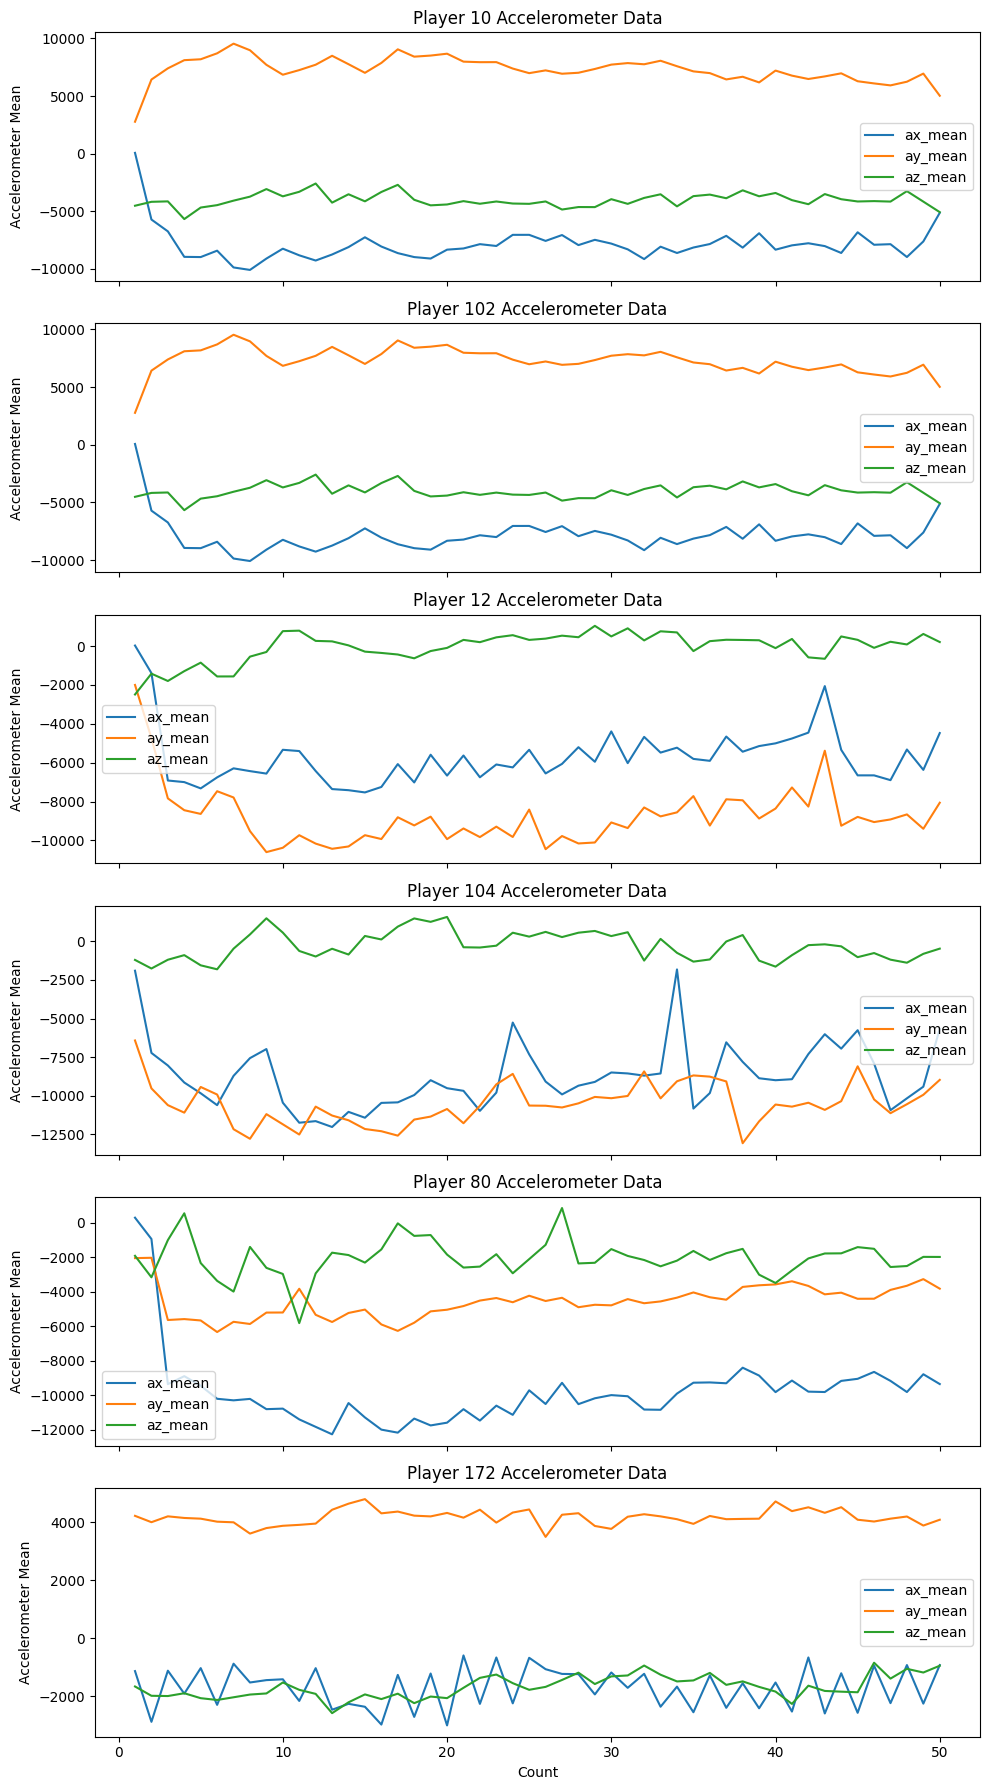

In [35]:
# Assuming 'classifyData' is your DataFrame
plotdata = cleanedData.copy()
plotdata = plotdata[['id','date', 'testmode', 'teststage', 'fileindex', 'count', 'handedness', 'holdRacketHanded', 'ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean']]

# Filter the data
filtered_plotdata = plotdata[(plotdata['testmode'] == 0) & (plotdata['teststage'] == 0)
                                & (plotdata['fileindex'] == 1) & (plotdata['date'] == '2020-02-18 00:00:00')
                                & (plotdata['handedness'] == 1) & (plotdata['holdRacketHanded'] == 1)]

filtered_plotdata = filtered_plotdata.dropna()
filtered_plotdata = filtered_plotdata.drop_duplicates()
filtered_plotdata = filtered_plotdata.reset_index(drop=True)

# Get unique player IDs from the filtered data
player_ids_filtered = filtered_plotdata['id'].unique()
print(f"Number of players with data after filtering: {len(player_ids_filtered)}")
print("Players with data after filtering:", player_ids_filtered)

# Check the number of rows for Player 10, 12 and 80 in the filtered data

player_10_data_count = len(filtered_plotdata[filtered_plotdata['id'] == 10])
player_12_data_count = len(filtered_plotdata[filtered_plotdata['id'] == 12])
player_80_data_count = len(filtered_plotdata[filtered_plotdata['id'] == 80])

# export all the data of player 12 to excel file
#filtered_plotdata[filtered_plotdata['id'] == 12].to_excel('player_12_data.xlsx', index=False)

print(f"Number of data points for Player 10 after filtering: {player_10_data_count}")
print(f"Number of data points for Player 12 after filtering: {player_12_data_count}")
print(f"Number of data points for Player 80 after filtering: {player_80_data_count}")

# --- The rest of your plotting code remains the same ---
num_players = len(player_ids_filtered)
fig, axes = plt.subplots(num_players, 1, figsize=(10, 3 * num_players), sharex=True)

if num_players == 1:
    axes = [axes]

for idx, player_id in enumerate(player_ids_filtered):
    ax = axes[idx]
    player_data = filtered_plotdata[filtered_plotdata['id'] == player_id]

    ax.plot(player_data['count'], player_data['ax_mean'], label='ax_mean')
    ax.plot(player_data['count'], player_data['ay_mean'], label='ay_mean')
    ax.plot(player_data['count'], player_data['az_mean'], label='az_mean')

    ax.set_title(f'Player {player_id} Accelerometer Data')
    ax.set_ylabel('Accelerometer Mean')
    ax.legend()

axes[-1].set_xlabel('Count')

plt.tight_layout()
plt.show()

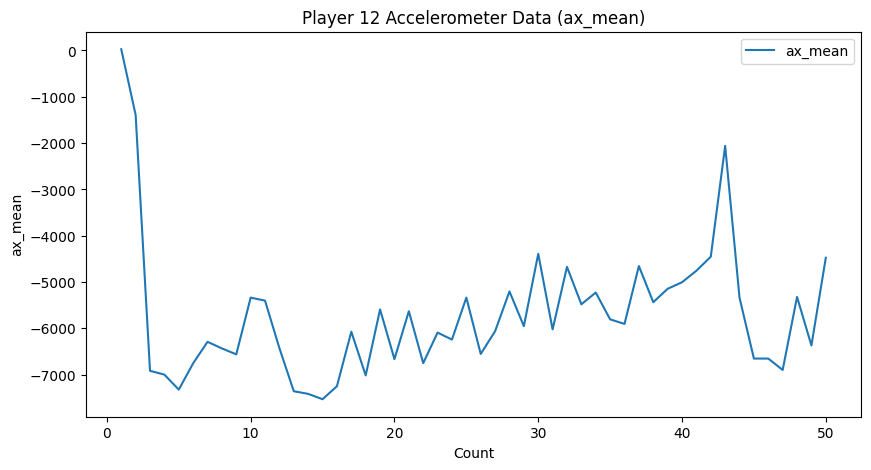

In [22]:
# plot player with id =12 and ax_mean only
player_12_data = filtered_plotdata[filtered_plotdata['id'] == 12]
plt.figure(figsize=(10, 5))
plt.plot(player_12_data['count'], player_12_data['ax_mean'], label='ax_mean')
plt.title('Player 12 Accelerometer Data (ax_mean)')
plt.xlabel('Count')
plt.ylabel('ax_mean')
plt.legend()
plt.show()

In [11]:
# the correlation coefficient amongst the features and the target variable are low when consider all target variables. To avoid this, filtered the data based on the target variable
# filtered the data based on the target variable ( height == high )

targets = ['height']
filtered_data = classifyData[classifyData['height'] == 2]  # height == high

# Optionally, drop the target column for computing correlation with features
features = filtered_data.drop(columns=targets)

# Calculate the correlation matrix between features and the target variable (height)
correlations = features.corrwith(filtered_data['height'])

# Display the correlations
print("Correlation of features with 'height' (filtered where height == high):")
print(correlations)


Correlation of features with 'height' (filtered where height == high):
Unnamed: 0         NaN
id                 NaN
date               NaN
testmode           NaN
teststage          NaN
fileindex          NaN
count              NaN
ax_mean            NaN
ay_mean            NaN
az_mean            NaN
gx_mean            NaN
gy_mean            NaN
gz_mean            NaN
ax_var             NaN
ay_var             NaN
az_var             NaN
gx_var             NaN
gy_var             NaN
gz_var             NaN
ax_rms             NaN
ay_rms             NaN
az_rms             NaN
gx_rms             NaN
gy_rms             NaN
gz_rms             NaN
a_max              NaN
a_mean             NaN
a_min              NaN
g_max              NaN
g_mean             NaN
g_min              NaN
a_fft              NaN
g_fft              NaN
a_psdx             NaN
g_psdx             NaN
a_kurt             NaN
g_kurt             NaN
a_skewn            NaN
g_skewn            NaN
a_entropy          NaN
g_entropy

## Perform PCA (Principal Component Analysis)

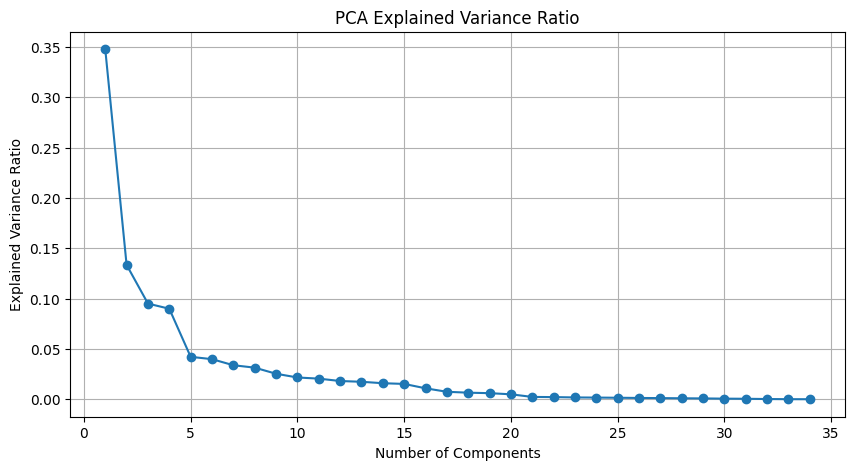

In [23]:
# preform PCA on the data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleanedData[['ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean',
                                                'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
                                                'ax_rms', 'ay_rms', 'az_rms', 'gx_rms', 'gy_rms', 'gz_rms',
                                                'a_max', 'a_mean', 'a_min', 'g_max', 'g_mean', 'g_min',
                                                'a_fft', 'g_fft', 'a_psdx', 'g_psdx', 'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy']])

# plot the PCA before choosing the number of components
pca = PCA()
pca.fit(scaled_data)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()


# TRAIN MODEL

## I. KNN classifier model
1) height with all features (18 means, var, rms + 10 max, min, skewness, kurtosis + 6 fft, psdx, entropy)
2) weight with all features
3) BMI with all features 
4) evaluations

### SPLITS DATA INTO TRAINING AND TESTING SETS

In [27]:
def plot_feature_correlation(data, features, target, numeric_target=True):
    """Plot correlation between features and target
    
    Parameters:
    -----------
    data : DataFrame
        The dataset containing features and target
    features : list
        List of feature names
    target : str
        Name of the target variable
    numeric_target : bool
        If False, assumes target is categorical and needs to be encoded
        
    Returns:
    --------
    correlation : Series
        Correlation values sorted by magnitude
    """
    plt.figure(figsize=(12, 10))
    
    # Create a copy of the data to avoid modifying the original
    data_copy = data.copy()
    
    # If target is categorical, encode it
    if not numeric_target:
        # Check if target is already numeric
        if data_copy[target].dtype == 'object' or data_copy[target].dtype.name == 'category':
            print(f"Converting categorical target '{target}' to numeric for correlation analysis")
            le = LabelEncoder()
            data_copy[target] = le.fit_transform(data_copy[target])
            classes_mapping = {i: label for i, label in enumerate(le.classes_)}
            print(f"Class mapping: {classes_mapping}")
    
    # Calculate correlation
    correlation = data_copy[features + [target]].corr()[target].sort_values(ascending=False)
    correlation = correlation.drop(target)  # Remove self-correlation
    
    # Plot
    sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
    plt.title(f'Feature Correlation with {target}')
    plt.xlabel('Correlation Coefficient')
    plt.axvline(x=0, color='r', linestyle='-', alpha=0.3)  # Add vertical line at x=0
    plt.tight_layout()
    plt.show()
    
    return correlation

# Function to perform KNN classification with comprehensive evaluation
def comprehensive_knn(X_train, X_test, y_train, y_test, k=5, target_name='target'):
    """
    Perform KNN classification with detailed evaluation
    
    Parameters:
    -----------
    X_train, X_test : feature sets for training and testing
    y_train, y_test : target values for training and testing
    k : number of neighbors to use
    target_name : name of the target variable for reporting
    
    Returns:
    --------
    accuracy, model, y_pred, evaluation_metrics
    """
    # Initialize and fit the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict
    y_pred = knn.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store metrics in a dictionary
    evaluation_metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    
    # Print metrics
    print(f"\nEvaluation for {target_name} classification (k={k}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    return accuracy, knn, y_pred, evaluation_metrics

# Function to find optimal k value
def find_optimal_k(X_train, X_test, y_train, y_test, k_range=range(1, 21), target_name='target'):
    """Find the optimal k value for KNN"""
    k_accuracy = {}
    best_k = 1
    best_accuracy = 0
    
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        k_accuracy[k] = accuracy
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
    
    # Plot k vs accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(list(k_accuracy.keys()), list(k_accuracy.values()), marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. k for {target_name} Classification')
    plt.xticks(list(k_accuracy.keys()))
    plt.grid(True)
    plt.show()
    
    print(f"Best k value: {best_k} with accuracy: {best_accuracy:.4f}")
    return best_k, k_accuracy

# Function to perform cross-validation
def cross_validate_knn(X, y, k=5, n_splits=5, target_name='target'):
    """Perform cross-validation for KNN model"""
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X, y, cv=n_splits, scoring='accuracy')
    
    print(f"\nCross-Validation Results for {target_name} (k={k}, {n_splits}-fold):")
    print(f"CV Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
    print(f"Standard Deviation: {np.std(cv_scores):.4f}")
    
    return cv_scores

# Function to visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    return cm

# Feature selection function
def select_best_features(X_train, y_train, X_test, k_features=15):
    """Select the best k features using ANOVA F-value"""
    selector = SelectKBest(f_classif, k=k_features)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # Get selected feature names
    selected_indices = selector.get_support(indices=True)
    selected_feature_names = [X_train.columns[i] for i in selected_indices]
    
    print(f"\nTop {k_features} selected features:")
    for i, feature in enumerate(selected_feature_names):
        print(f"{i+1}. {feature}")
    
    return X_train_selected, X_test_selected, selected_feature_names, selector

# Grid search for hyperparameter tuning
def perform_grid_search(X_train, y_train, param_grid, cv=5):
    """Perform grid search for hyperparameter tuning"""
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    print("\nGrid Search Results:")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_params_, grid_search.best_estimator_

In [25]:
sensor_base_features = ['ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean', 
                        'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 
                        'ax_rms', 'ay_rms', 'az_rms', 'gx_rms', 'gy_rms', 'gz_rms']

sensor_derived_features = ['a_max', 'a_mean', 'a_min', 'g_max', 'g_mean', 'g_min',
                           'a_skewn', 'g_skewn', 'a_kurt', 'g_kurt']

fft_features = ['a_fft', 'g_fft', 'a_psdx', 'g_psdx', 'a_entropy', 'g_entropy']

personal_features = ['gender', 'age', 'playYears', 'handedness', 'holdRacketHanded']

# All features
all_sensor_features = sensor_base_features + sensor_derived_features + fft_features

# Check for missing values
missing_values = classifyData.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
date    97350
dtype: int64



--- Data Types Information ---
Target variable age type: object
Unique values in 'age': ['high' 'medium' 'low']

--- Target Variable Encoding ---
age mapping: {0: 'high', 1: 'low', 2: 'medium'}

--- Data Preprocessing ---
Feature data types before standardization:
float64    34
Name: count, dtype: int64

Checking for NaN values:
Total NaN values: 0
Train shape: (68145, 34)
Test shape: (29205, 34)

--- Exploratory Data Analysis ---

Class distribution for age:
2    52300
1    26900
0    18150
Name: count, dtype: int64
2    0.537
1    0.276
0    0.186
Name: proportion, dtype: float64


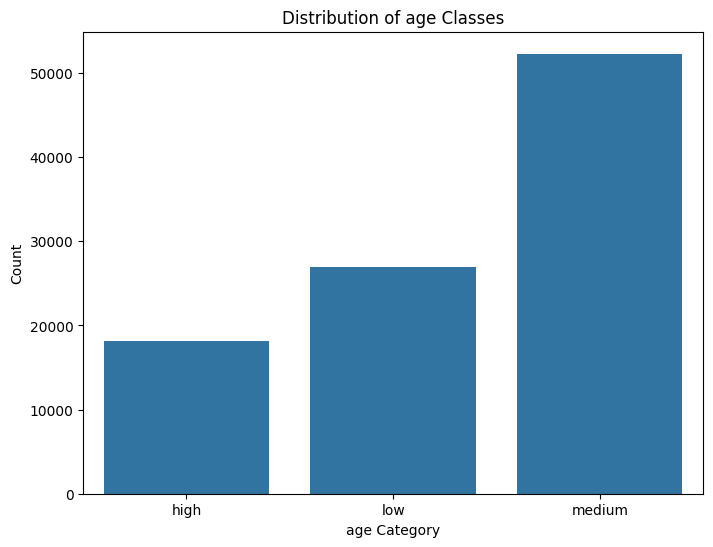


Feature statistics:
                 mean           std           min           max
a_psdx   1.772384e+09  1.389460e+10  1.448610e+04  7.770000e+11
g_psdx   1.467490e+09  9.678203e+09  2.816407e+05  3.600000e+11
a_fft    1.140358e+05  3.430765e+05 -1.736588e+06  1.334213e+07
g_fft    1.125574e+05  3.304920e+05 -8.271262e+05  1.098560e+07
a_max    1.549465e+04  7.515710e+03  6.212890e+01  4.889080e+04
g_max    1.537545e+04  4.738199e+03  2.130728e+01  4.103048e+04
ay_mean -2.183641e+02  3.992109e+03 -1.687200e+04  2.548733e+04
a_mean   6.766522e+03  3.377333e+03  5.770670e+01  3.156096e+04
ax_rms   4.875049e+03  2.902292e+03  3.208163e+01  2.576237e+04
ax_mean -2.921555e+03  2.845661e+03 -2.555750e+04  1.509647e+04

--- Feature Correlation Analysis ---


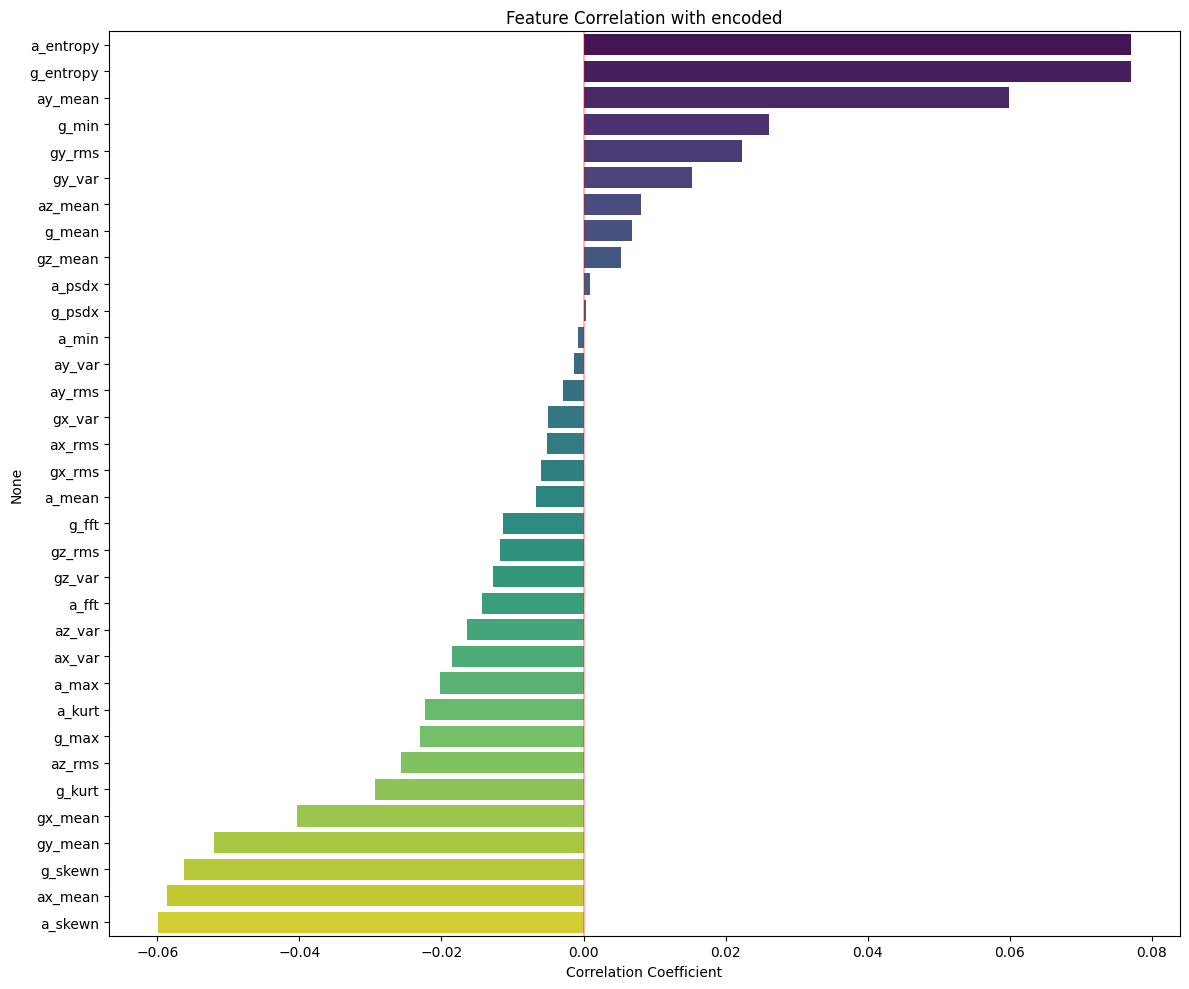

Top 10 features correlated with age:
a_entropy    0.077105
g_entropy    0.077060
ay_mean      0.059891
g_min        0.026161
gy_rms       0.022341
gy_var       0.015201
az_mean      0.008116
g_mean       0.006843
gz_mean      0.005266
a_psdx       0.000847
Name: encoded, dtype: float64

--- Feature Selection ---

Top 15 selected features:
1. ay_mean
2. az_mean
3. gy_mean
4. az_var
5. gx_var
6. gy_var
7. az_rms
8. gx_rms
9. gy_rms
10. g_min
11. a_skewn
12. g_skewn
13. g_kurt
14. a_entropy
15. g_entropy

--- Finding Optimal k Value ---


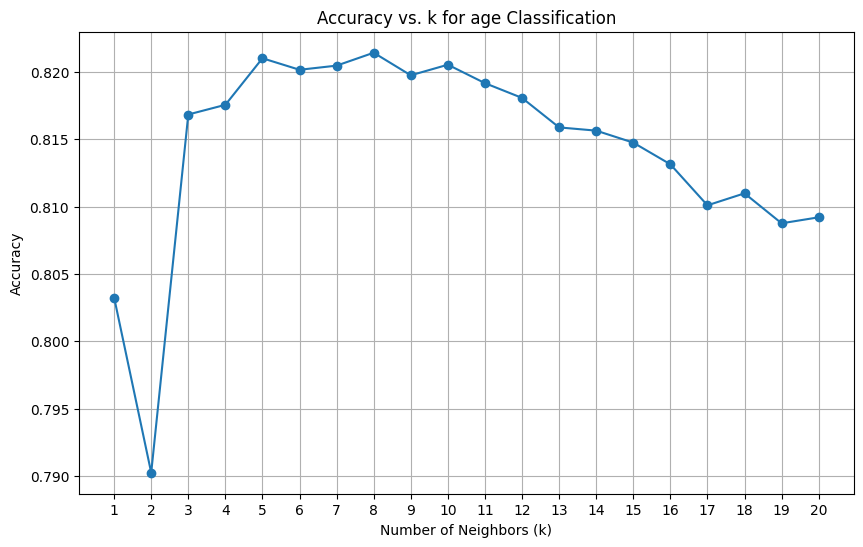

Best k value: 8 with accuracy: 0.8214

--- Hyperparameter Tuning ---

Grid Search Results:
Best parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best cross-validation score: 0.8171

--- Cross-Validation ---

Cross-Validation Results for age (k=7, 5-fold):
CV Scores: [0.81480666 0.80732262 0.80856996 0.80761611 0.80827647]
Mean CV Accuracy: 0.8093
Standard Deviation: 0.0028

--- Final Model Evaluation ---

Evaluation for age classification (k=7):
Accuracy: 0.8205
Precision: 0.8194
Recall: 0.8205
F1 Score: 0.8191

--- Confusion Matrix ---


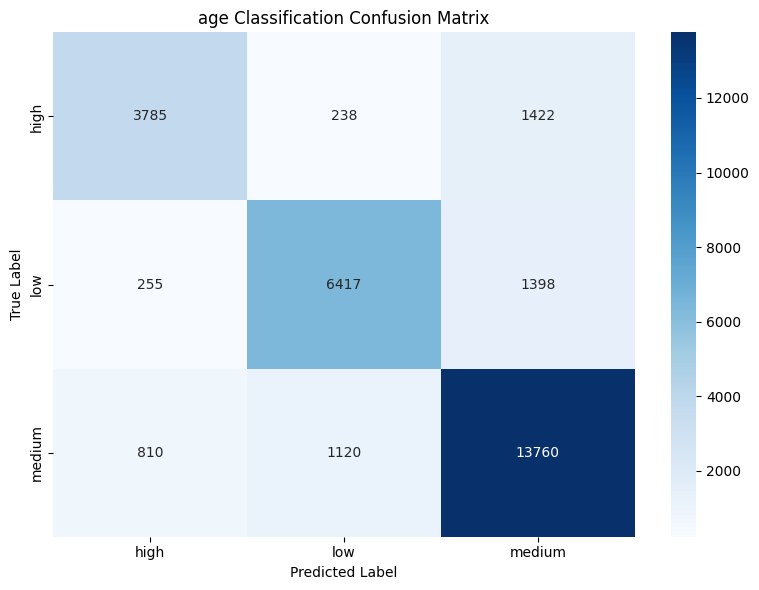


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      5445
           1       0.83      0.80      0.81      8070
           2       0.83      0.88      0.85     15690

    accuracy                           0.82     29205
   macro avg       0.81      0.79      0.80     29205
weighted avg       0.82      0.82      0.82     29205


--- Feature Importance Analysis ---


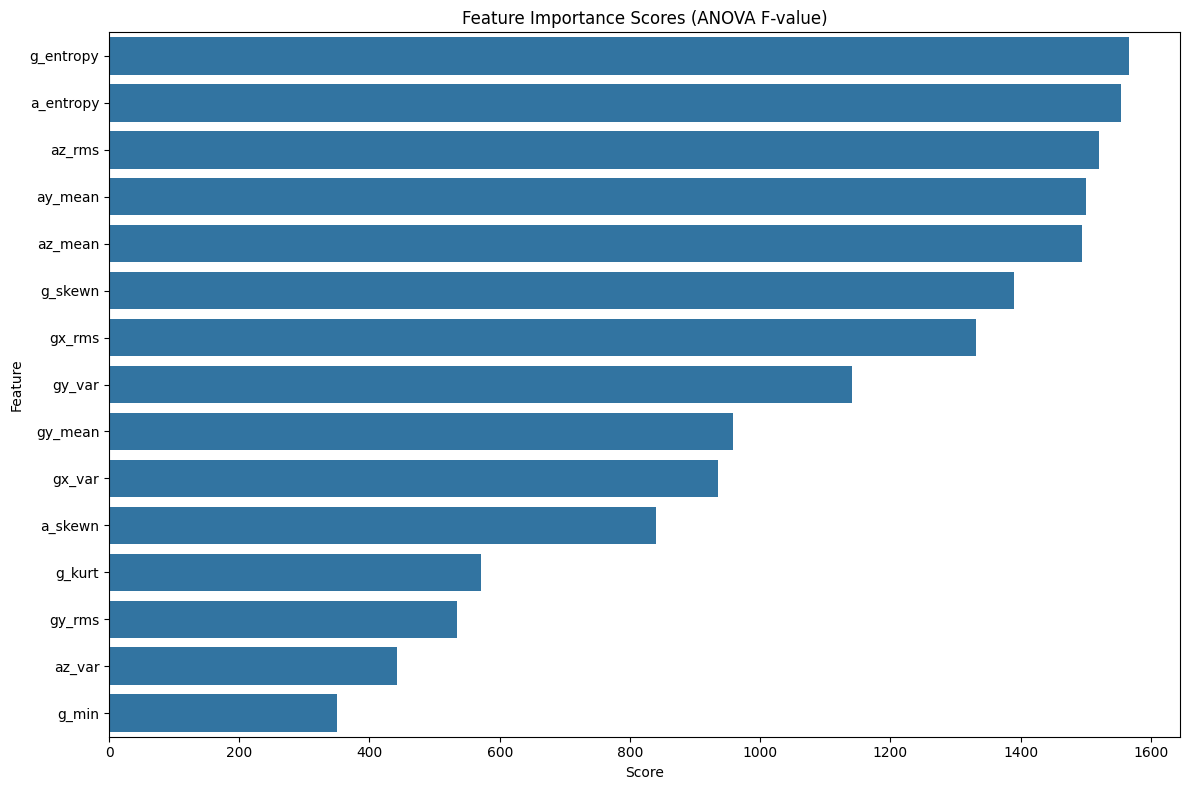

Top 15 features by importance:
      Feature        Score
33  g_entropy  1566.489183
32  a_entropy  1554.628391
14     az_rms  1519.886358
1     ay_mean  1500.358910
2     az_mean  1493.673209
25    g_skewn  1390.125798
15     gx_rms  1331.495267
10     gy_var  1140.532550
4     gy_mean   958.135022
9      gx_var   935.028688
24    a_skewn   840.426407
27     g_kurt   571.646738
16     gy_rms   535.185961
8      az_var   442.801567
23      g_min   349.938285

--- Performance by Feature Group ---

Evaluating Base Sensor Features...
Accuracy: 0.8740
F1-Score: 0.8736

Evaluating Derived Sensor Features...
Accuracy: 0.6581
F1-Score: 0.6514

Evaluating FFT Features...
Accuracy: 0.4903
F1-Score: 0.4709

Evaluating All Features...
Accuracy: 0.8883
F1-Score: 0.8878

Evaluating Base + Derived...
Accuracy: 0.8871
F1-Score: 0.8867

Evaluating Base + FFT...
Accuracy: 0.8782
F1-Score: 0.8776

Evaluating Derived + FFT...
Accuracy: 0.6709
F1-Score: 0.6648


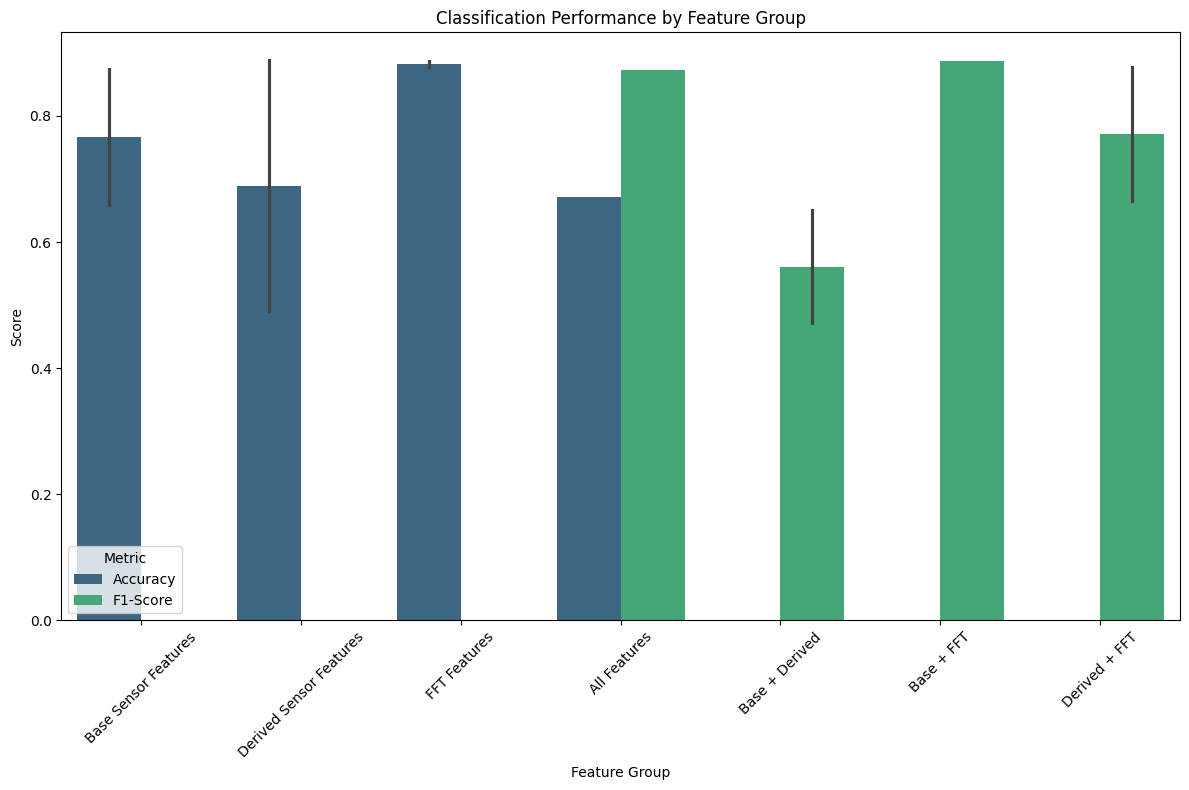


Best feature group by accuracy: All Features (Accuracy: 0.8883)
Best feature group by F1-Score: All Features (F1-Score: 0.8878)

--- Learning Curve Analysis ---


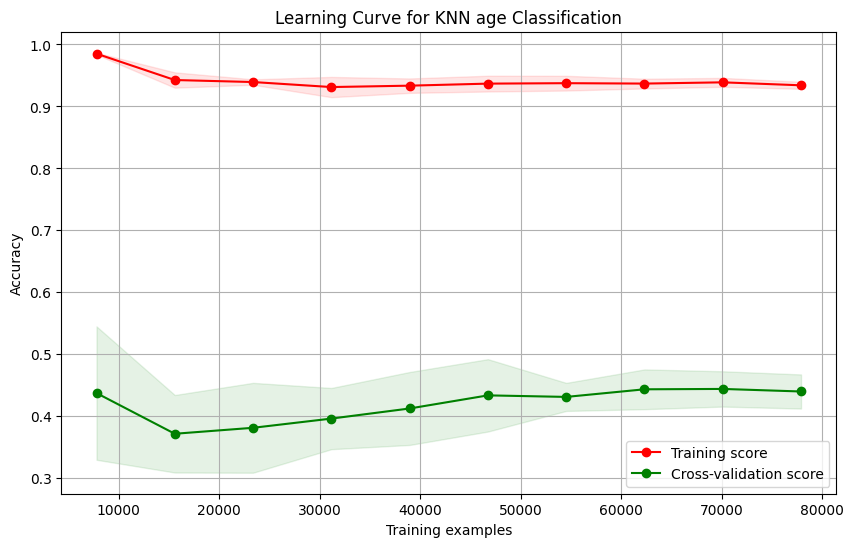


--- Summary ---
Best model parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Final model accuracy: 0.8205
Other metrics: {'accuracy': 0.8204759458996748, 'precision': 0.8194211645156501, 'recall': 0.8204759458996748, 'f1_score': 0.8190627315484283}
Top 5 most important features: ay_mean, az_mean, gy_mean, az_var, gx_var

--- Misclassifications Analysis ---
Number of misclassified samples: 5243

Misclassification counts by class:
True age  Predicted age
high      low               238
          medium           1422
low       high              255
          medium           1398
medium    high              810
          low              1120
dtype: int64

Most commonly confused categories:
True age  Predicted age
high      medium           1422
low       medium           1398
medium    low              1120
dtype: int64

--- Recommendations ---
1. Best features for prediction: ay_mean, az_mean, gy_mean, az_var, gx_var
2. Optimal number of neighbors (k): 7
3. Best distance me

In [31]:
# Randomly shuffle the datasets and split into train (70%) and test (30%)
X = classifyData[all_sensor_features]
params = {
	'test_size': 0.3,
	'random_state': 42,
	'target': 'age'  # Change this to the target variable you want to classify
}

# Check the data types first
print("\n--- Data Types Information ---")
print(f"Target variable {params['target']} type:", classifyData[params['target']].dtype)
print(f"Unique values in '{params['target']}':", classifyData[params['target']].unique())

# Encode the target variable for classification
print("\n--- Target Variable Encoding ---")
le = LabelEncoder()
y_encoded = le.fit_transform(classifyData[params['target']])
classes = le.classes_
class_mapping = {i: label for i, label in enumerate(classes)}
print(f"{params['target']} mapping: {class_mapping}")

# Store both original and encoded targets
y_original = classifyData[params['target']]
y = y_encoded

# 1. Data Preprocessing
print("\n--- Data Preprocessing ---")
# Check for data issues before standardization
print("Feature data types before standardization:")
print(X.dtypes.value_counts())
print("\nChecking for NaN values:")
nan_counts = X.isna().sum()
print(f"Total NaN values: {nan_counts.sum()}")
if nan_counts.sum() > 0:
    print(nan_counts[nan_counts > 0])

# Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=params['test_size'], random_state=params['random_state'], stratify=y
)

# Also split the original labels for reporting
_, y_test_original = train_test_split(
    y_original, test_size=params['test_size'], random_state=params['random_state'], stratify=y
)

print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

# 2. Exploratory Data Analysis
print("\n--- Exploratory Data Analysis ---")
# Print class distribution
print(f"\nClass distribution for {params['target']}:")
counts = pd.Series(y).value_counts()
print(counts)
print(pd.Series(y).value_counts(normalize=True).round(3))

# Map encoded values back to original labels for plotting
labels = [class_mapping[i] for i in range(len(class_mapping))]

# Plot class distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y)
plt.title(f'Distribution of {params["target"]} Classes')
plt.xlabel(f'{params["target"]} Category')
plt.ylabel('Count')
# Replace x-axis labels with original class names
ax.set_xticklabels(labels)
plt.show()

# Basic statistics of features
print("\nFeature statistics:")
features_stats = X.describe().T.sort_values(by='std', ascending=False)
print(features_stats[['mean', 'std', 'min', 'max']].head(10))

# 3. Feature correlation analysis
print("\n--- Feature Correlation Analysis ---")
# Create a copy of the data with encoded for correlation analysis
data_for_corr = classifyData.copy()
data_for_corr['encoded'] = y

top_correlations = plot_feature_correlation(
    data_for_corr, all_sensor_features, 'encoded', numeric_target=True
)
print(f"Top 10 features correlated with {params['target']}:")
print(top_correlations.head(10))

# 4. Feature Selection
print("\n--- Feature Selection ---")
X_train_selected, X_test_selected, selected_features, selector = select_best_features(
    pd.DataFrame(X_train, columns=X.columns), y_train, 
    pd.DataFrame(X_test, columns=X.columns), k_features=15
)

# 5. Find Optimal k
print("\n--- Finding Optimal k Value ---")
best_k, k_accuracy_dict = find_optimal_k(
    X_train_selected, X_test_selected, y_train, y_test, 
    k_range=range(1, 21), target_name=params['target']
)

# 6. Hyperparameter Tuning
print("\n--- Hyperparameter Tuning ---")
param_grid = {
    'n_neighbors': range(1, 21, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean
}
best_params, best_model = perform_grid_search(X_train_selected, y_train, param_grid)

# 7. Cross-Validation with best parameters
print("\n--- Cross-Validation ---")
knn_optimal = KNeighborsClassifier(**best_params)
cv_scores = cross_validate_knn(
    X_train_selected, y_train, k=best_params['n_neighbors'], 
    n_splits=5, target_name=params['target']
)

# 8. Final Model Training and Evaluation
print("\n--- Final Model Evaluation ---")
accuracy, final_model, y_pred, metrics = comprehensive_knn(
    X_train_selected, X_test_selected, y_train, y_test, 
    k=best_params['n_neighbors'], target_name=params['target']
)

# 9. Confusion Matrix
print("\n--- Confusion Matrix ---")
# Use original class names for better interpretability in the confusion matrix
cm = plot_confusion_matrix(y_test, y_pred, labels, title=f'{params["target"]} Classification Confusion Matrix')

# 10. Classification Report
print("\n--- Classification Report ---")
report = classification_report(y_test, y_pred)
print(report)

# 11. Feature Importance Analysis
print("\n--- Feature Importance Analysis ---")
if hasattr(selector, 'scores_'):
    feature_scores = pd.DataFrame({
        'Feature': X.columns,
        'Score': selector.scores_
    })
    
    # Sort by score in descending order
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    
    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Score', y='Feature', data=feature_scores.head(15))
    plt.title('Feature Importance Scores (ANOVA F-value)')
    plt.tight_layout()
    plt.show()
    
    print("Top 15 features by importance:")
    print(feature_scores.head(15))

# 12. Performance by Feature Group
print("\n--- Performance by Feature Group ---")
feature_groups = {
    'Base Sensor Features': sensor_base_features,
    'Derived Sensor Features': sensor_derived_features,
    'FFT Features': fft_features,
    'All Features': all_sensor_features
}

# Let's also try adding combined feature groups
feature_groups['Base + Derived'] = sensor_base_features + sensor_derived_features
feature_groups['Base + FFT'] = sensor_base_features + fft_features
feature_groups['Derived + FFT'] = sensor_derived_features + fft_features

group_performance = {}
group_f1_scores = {}

for group_name, features in feature_groups.items():
    print(f"\nEvaluating {group_name}...")
    X_group = classifyData[features]
    X_group_scaled = pd.DataFrame(scaler.fit_transform(X_group), columns=X_group.columns)
    
    X_train_group, X_test_group, y_train_group, y_test_group = train_test_split(
        X_group_scaled, y, test_size=params['test_size'], random_state=params['random_state'], stratify=y
    )
    
    knn_group = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], 
                                    weights=best_params['weights'],
                                    p=best_params['p'])
    knn_group.fit(X_train_group, y_train_group)
    y_pred_group = knn_group.predict(X_test_group)
    
    accuracy_group = accuracy_score(y_test_group, y_pred_group)
    f1_group = f1_score(y_test_group, y_pred_group, average='weighted')
    
    group_performance[group_name] = accuracy_group
    group_f1_scores[group_name] = f1_group
    
    print(f"Accuracy: {accuracy_group:.4f}")
    print(f"F1-Score: {f1_group:.4f}")

# Plot performance by feature group
plt.figure(figsize=(12, 8))
group_names = list(group_performance.keys())
accuracies = list(group_performance.values())
f1_scores = list(group_f1_scores.values())

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Feature Group': np.repeat(group_names, 2),
    'Score': accuracies + f1_scores,
    'Metric': ['Accuracy'] * len(group_names) + ['F1-Score'] * len(group_names)
})

# Plot grouped bar chart
sns.barplot(x='Feature Group', y='Score', hue='Metric', data=plot_data, palette='viridis')
plt.title('Classification Performance by Feature Group')
plt.xlabel('Feature Group')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Find best feature group
best_group = max(group_performance.items(), key=lambda x: x[1])
print(f"\nBest feature group by accuracy: {best_group[0]} (Accuracy: {best_group[1]:.4f})")
best_f1_group = max(group_f1_scores.items(), key=lambda x: x[1])
print(f"Best feature group by F1-Score: {best_f1_group[0]} (F1-Score: {best_f1_group[1]:.4f})")

# 13. Learning Curve
print("\n--- Learning Curve Analysis ---")
# We already imported learning_curve at the top

train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(**best_params), X_scaled, y, 
    cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title(f'Learning Curve for KNN {params["target"]} Classification')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print("\n--- Summary ---")
print(f"Best model parameters: {best_params}")
print(f"Final model accuracy: {accuracy:.4f}")
print(f"Other metrics: {metrics}")
print(f"Top 5 most important features: {', '.join(selected_features[:5])}")

# Add some additional insights
print("\n--- Misclassifications Analysis ---")
misclassified_indices = np.where(y_pred != y_test)[0]
if len(misclassified_indices) > 0:
    print(f"Number of misclassified samples: {len(misclassified_indices)}")
    
    # Convert indices to original class names
    y_test_classes = [labels[y] for y in y_test[misclassified_indices]]
    y_pred_classes = [labels[y] for y in y_pred[misclassified_indices]]
    
    misclassification_df = pd.DataFrame({
        f'True {params["target"]}': y_test_classes,
        f'Predicted {params["target"]}': y_pred_classes
    })
    
    print("\nMisclassification counts by class:")
    print(misclassification_df.groupby([f'True {params["target"]}', f'Predicted {params["target"]}']).size())

    # Which categories are most often confused?
    confused_pairs = misclassification_df.groupby([f'True {params["target"]}', f'Predicted {params["target"]}']).size().sort_values(ascending=False)
    print("\nMost commonly confused categories:")
    print(confused_pairs.head(3))
else:
    print("No misclassifications in the test set!")

# Final recommendations
print("\n--- Recommendations ---")
print("1. Best features for prediction:", ', '.join(selected_features[:5]))
print(f"2. Optimal number of neighbors (k): {best_params['n_neighbors']}")
print(f"3. Best distance metric: {'Manhattan' if best_params['p'] == 1 else 'Euclidean'}")
print(f"4. Best feature group: {best_group[0]}")
print("5. Model achieved good performance with an accuracy of {:.2f}%".format(accuracy * 100))

# Save the model for future use if needed
# import joblib
# joblib.dump(final_model, 'knn_prediction_classifier.pkl')
# print("6. Model saved as 'knn_prediction_classifier.pkl' for future use")

## II. Decision tree classifier model
1) height with all features
2) weight with all features
3) age with all features
4) evaluations

In [7]:
def decision_tree_target(train, test, target='height', max_depth=None, min_samples_split=2, criterion='gini'):
    """
    Train a decision tree classifier and evaluate its performance
    
    Parameters:
    -----------
    train : DataFrame
        Training dataset
    test : DataFrame
        Testing dataset
    target : str
        Target variable to predict (height, weight, or age)
    max_depth : int, optional
        Maximum depth of the decision tree
    min_samples_split : int, optional
        Minimum samples required to split a node
    criterion : str, optional
        The function to measure the quality of a split ('gini', 'entropy', 'log_loss')
        
    Returns:
    --------
    accuracy : float
        Model accuracy on test set
    y_pred : array
        Predictions on test set
    dt : DecisionTreeClassifier
        Trained model
    """
    # Define features to use
    features = [
        'ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean',
        'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
        'ax_rms', 'ay_rms', 'az_rms', 'gx_rms', 'gy_rms', 'gz_rms',
        'a_max', 'a_mean', 'a_min', 'g_max', 'g_mean', 'g_min',
        'a_fft', 'g_fft', 'a_psdx', 'g_psdx',
        'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn',
        'a_entropy', 'g_entropy'
    ]
    
    # Train model with optimized parameters
    dt = DecisionTreeClassifier(
        random_state=42,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        criterion=criterion
    )
    
    X_train = train[features].values
    y_train = train[target].values
    
    dt.fit(X_train, y_train)
    
    # Predict on test set
    X_test = test[features].values
    y_test = test[target].values
    y_pred = dt.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Decision Tree for {target} classification (criterion={criterion}, max_depth={max_depth}): {accuracy:.2f}')
    
    return accuracy, y_pred, dt, features

def visualize_decision_tree(model, feature_names, class_names, fold_number, target, max_depth, criterion):
    """
    Visualize a decision tree model
    
    Parameters:
    -----------
    model : DecisionTreeClassifier
        Trained decision tree model
    feature_names : list
        List of feature names
    class_names : list
        List of class names
    fold_number : int
        Current fold number for labeling
    target : str
        Target variable being predicted
    max_depth : int
        Maximum depth of the tree
    criterion : str
        Splitting criterion used
    """
    plt.figure(figsize=(20, 10))
    plot_tree(
        model, 
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=8
    )
    plt.title(f'Decision Tree for {target} Classification (Fold {fold_number+1}, {criterion}, depth={max_depth})')
    plt.tight_layout()
    
    # Save the visualization to a file
    os.makedirs('tree_visualizations', exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'tree_visualizations/DT_{target}_f{fold_number+1}_{criterion}_d{max_depth}_{timestamp}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'Visualization saved to {filename}')
    plt.close()

def evaluate_model_performance(y_true, y_pred, target):
    """
    Evaluate model performance with detailed metrics
    
    Parameters:
    -----------
    y_true : array
        True labels
    y_pred : array
        Predicted labels
    target : str
        Target variable name
    """
    print(f"\nClassification Report for {target}:")
    print(classification_report(y_true, y_pred))

def feature_importance_analysis(model, feature_names, target, criterion, max_depth):
    """
    Analyze and visualize feature importance
    
    Parameters:
    -----------
    model : DecisionTreeClassifier
        Trained decision tree model
    feature_names : list
        List of feature names
    target : str
        Target variable name
    criterion : str
        Splitting criterion used
    max_depth : int
        Maximum depth of the tree
    """
    # Get feature importances
    importances = model.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]
    
    # Get the top 15 features
    top_n = min(15, len(feature_names))
    top_indices = indices[:top_n]
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances - {target} ({criterion}, depth={max_depth})')
    plt.bar(range(top_n), importances[top_indices], align='center')
    plt.xticks(range(top_n), [feature_names[i] for i in top_indices], rotation=90)
    plt.tight_layout()
    
    # Save the feature importance plot
    os.makedirs('feature_importance', exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'feature_importance/importance_{target}_{criterion}_d{max_depth}_{timestamp}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'Feature importance plot saved to {filename}')
    plt.close()
    
    # Return top features and their importance
    return [(feature_names[i], importances[i]) for i in top_indices]

def cross_validate_decision_tree(data, target='height', n_splits=5, max_depth=5, min_samples_split=2, criterion='gini'):
    """
    Perform cross-validation for decision tree model
    
    Parameters:
    -----------
    data : DataFrame
        Dataset to use
    target : str
        Target variable to predict
    n_splits : int
        Number of folds for cross-validation
    max_depth : int
        Maximum depth of the decision tree
    min_samples_split : int
        Minimum samples required to split a node
    criterion : str
        The function to measure the quality of a split
    """
    # Initialize k-fold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Lists to store results
    accuracy_scores = []
    all_true_labels = []
    all_predictions = []
    models = []
    
    # Get class names for visualization
    class_names = sorted(data[target].unique())
    
    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(data)):
        print(f"\n--- Fold {fold+1}/{n_splits} ---")
        
        # Split data
        train, test = data.iloc[train_index], data.iloc[test_index]
        
        # Train and evaluate model
        accuracy, y_pred, dt, features = decision_tree_target(
            train, test, target=target, 
            max_depth=max_depth, 
            min_samples_split=min_samples_split,
            criterion=criterion
        )
        
        # Store results
        accuracy_scores.append(accuracy)
        all_true_labels.extend(test[target].values)
        all_predictions.extend(y_pred)
        models.append(dt)
        
        # Visualize decision tree (only for first fold to avoid too many plots)
        # if fold == 0:
        #     visualize_decision_tree(dt, features, class_names, fold, target, max_depth, criterion)
        
        # Analyze feature importance (only for the first fold)
        if fold == 0:
            top_features = feature_importance_analysis(dt, features, target, criterion, max_depth)
            print("\nTop feature importances:")
            for feature, importance in top_features:
                print(f"{feature}: {importance:.4f}")
    
    # Calculate mean accuracy
    mean_accuracy = np.mean(accuracy_scores)
    print(f'\nMean Accuracy across {n_splits} folds: {mean_accuracy:.4f}')
    
    # Evaluate overall model performance
    evaluate_model_performance(all_true_labels, all_predictions, target)
    
    return mean_accuracy, models

def hyperparameter_tuning(data, targets=['height', 'weight', 'age']):
    """
    Perform hyperparameter tuning for decision tree models
    
    Parameters:
    -----------
    data : DataFrame
        Dataset to use
    targets : list
        List of target variables to predict
    """
    # Define hyperparameter ranges
    criteria = ['gini', 'entropy', 'log_loss']  # 'log_loss' is also available in newer versions 'gini', 'entropy',
    max_depths = [None]  # None means no limit
    min_samples_splits = [2, 5, 10]
    n_splits = 5
    
    # Store results
    results = []
    
    print("=== HYPERPARAMETER TUNING FOR DECISION TREE ===\n")
    
    for target in targets:
        print(f"\n{'='*60}")
        print(f"TUNING FOR TARGET: {target.upper()}")
        print(f"{'='*60}")
        
        target_results = []
        
        for criterion in criteria:
            for max_depth in max_depths:
                for min_samples_split in min_samples_splits:
                    print(f"\nTesting: criterion={criterion}, max_depth={max_depth}, min_samples_split={min_samples_split}")
                    print("-" * 80)
                    
                    try:
                        mean_accuracy, models = cross_validate_decision_tree(
                            data,
                            target=target,
                            n_splits=n_splits,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            criterion=criterion
                        )
                        
                        # Store results
                        result = {
                            'target': target,
                            'criterion': criterion,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'mean_accuracy': mean_accuracy,
                            'models': models
                        }
                        results.append(result)
                        target_results.append(result)
                        
                    except Exception as e:
                        print(f"Error with parameters: {e}")
                        continue
        
        # Find best parameters for this target
        if target_results:
            best_result = max(target_results, key=lambda x: x['mean_accuracy'])
            print(f"\n{'*'*60}")
            print(f"BEST PARAMETERS FOR {target.upper()}:")
            print(f"Criterion: {best_result['criterion']}")
            print(f"Max Depth: {best_result['max_depth']}")
            print(f"Min Samples Split: {best_result['min_samples_split']}")
            print(f"Best Mean Accuracy: {best_result['mean_accuracy']:.4f}")
            print(f"{'*'*60}")
    
    return results

def summarize_results(results):
    """
    Summarize and display the best results for each target
    
    Parameters:
    -----------
    results : list
        List of dictionaries containing results from hyperparameter tuning
    """
    print("\n" + "="*80)
    print("SUMMARY OF BEST RESULTS")
    print("="*80)
    
    # Group results by target
    targets = list(set([r['target'] for r in results]))
    
    for target in targets:
        target_results = [r for r in results if r['target'] == target]
        if target_results:
            best_result = max(target_results, key=lambda x: x['mean_accuracy'])
            
            print(f"\nTarget: {target.upper()}")
            print("-" * 40)
            print(f"Best Accuracy: {best_result['mean_accuracy']:.4f}")
            print(f"Criterion: {best_result['criterion']}")
            print(f"Max Depth: {best_result['max_depth']}")
            print(f"Min Samples Split: {best_result['min_samples_split']}")

# Updated main execution code
def main_execution(classifyData):
    """
    Main execution function with hyperparameter tuning
    
    Parameters:
    -----------
    classifyData : DataFrame
        The dataset to use for classification
    """
    # Initialize k-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Quick test with default parameters (your original code)
    print("=== QUICK TEST WITH DEFAULT PARAMETERS ===")
    accuracy_scores = []
    predictions = []
    models = []
    
    for train_index, test_index in kf.split(classifyData):
        train, test = classifyData.iloc[train_index], classifyData.iloc[test_index]
        accuracy, y_pred, dt, _ = decision_tree_target(train, test, target='height')
        accuracy_scores.append(accuracy)
        predictions.append(y_pred)
        models.append(dt)
        
    # Calculate the mean accuracy
    mean_accuracy = np.mean(accuracy_scores)
    print(f'Mean Accuracy (default parameters): {mean_accuracy:.2f}')
    
    # Define targets and basic parameters
    targets = ['height', 'weight', 'age']
    basic_params = {
        'max_depth': 5,        # Limit tree depth to prevent overfitting
        'min_samples_split': 5, # Require more samples to split nodes
        'n_splits': 5         # Number of folds for cross-validation
    }
    
    # Test with basic parameters for all targets
    print("\n=== TESTING WITH BASIC PARAMETERS ===")
    for target in targets:
        print(f"\n=== Cross-validation for {target} classification ===")
        accuracy, models = cross_validate_decision_tree(
            classifyData, 
            target=target,
            n_splits=basic_params['n_splits'],
            max_depth=basic_params['max_depth'],
            min_samples_split=basic_params['min_samples_split']
        )
    
    # Perform comprehensive hyperparameter tuning
    print("\n=== COMPREHENSIVE HYPERPARAMETER TUNING ===")
    results = hyperparameter_tuning(classifyData, targets)
    
    # Summarize results
    summarize_results(results)
    
    return results

# Usage example:
# results = main_execution(cleanedData)

In [14]:
# accuracy_scores = []
# predictions = []
# models = []
# for train_index, test_index in kf.split(classifyData):
#     train, test = classifyData.iloc[train_index], classifyData.iloc[test_index]
#     accuracy, y_pred, dt = decision_tree_target(train, test, target='height')
#     accuracy_scores.append(accuracy)
#     predictions.append(y_pred)
#     models.append(dt)
    
# # calculate the mean accuracy
# mean_accuracy = np.mean(accuracy_scores)
# print(f'Mean Accuracy: {mean_accuracy:.2f}')

# # Define hyperparameters
# # default maximum depth of the tree is?
# targets = ['height', 'weight', 'age']
# params = {
#     'max_depth': 5,        # Limit tree depth to prevent overfitting
#     'min_samples_split': 5, # Require more samples to split nodes
#     'target': targets[1], 	# Target variable for classification
#     'n_splits': 5         	# Number of folds for cross-validation
# }

# for target in targets:
# 	print(f"\n=== Cross-validation for {target} classification ===")
# 	accuracy, models = cross_validate_decision_tree(
# 		cleanedData, 
# 		target=target,
# 		n_splits=params['n_splits'],
# 		max_depth=5, # reduce to 5 to better visualize the tree
# 		min_samples_split=params['min_samples_split']
# 	)

results = main_execution(classifyData= classifyData)

=== QUICK TEST WITH DEFAULT PARAMETERS ===
Decision Tree for height classification (criterion=gini, max_depth=None): 0.74
Decision Tree for height classification (criterion=gini, max_depth=None): 0.73
Decision Tree for height classification (criterion=gini, max_depth=None): 0.74
Decision Tree for height classification (criterion=gini, max_depth=None): 0.73
Decision Tree for height classification (criterion=gini, max_depth=None): 0.73
Mean Accuracy (default parameters): 0.73

=== TESTING WITH BASIC PARAMETERS ===

=== Cross-validation for height classification ===

--- Fold 1/5 ---
Decision Tree for height classification (criterion=gini, max_depth=5): 0.54
Feature importance plot saved to feature_importance/importance_height_gini_d5_20250525_150704.png

Top feature importances:
ay_mean: 0.2112
ax_mean: 0.1870
az_mean: 0.1523
a_max: 0.0596
g_max: 0.0596
g_entropy: 0.0595
ay_var: 0.0534
gz_var: 0.0530
a_skewn: 0.0485
az_var: 0.0261
gy_rms: 0.0197
az_rms: 0.0181
gy_var: 0.0162
gx_var: 0.01

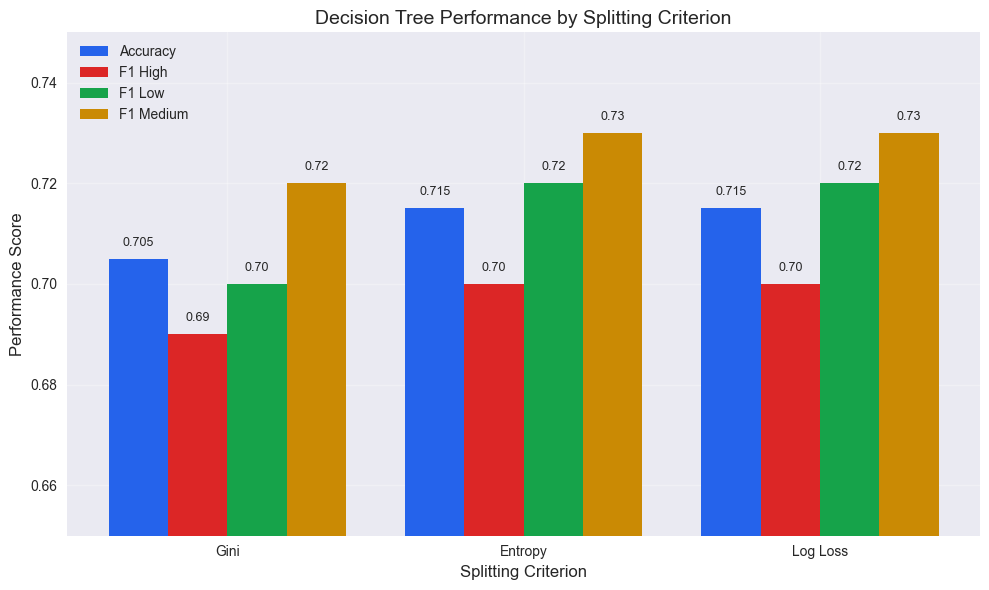

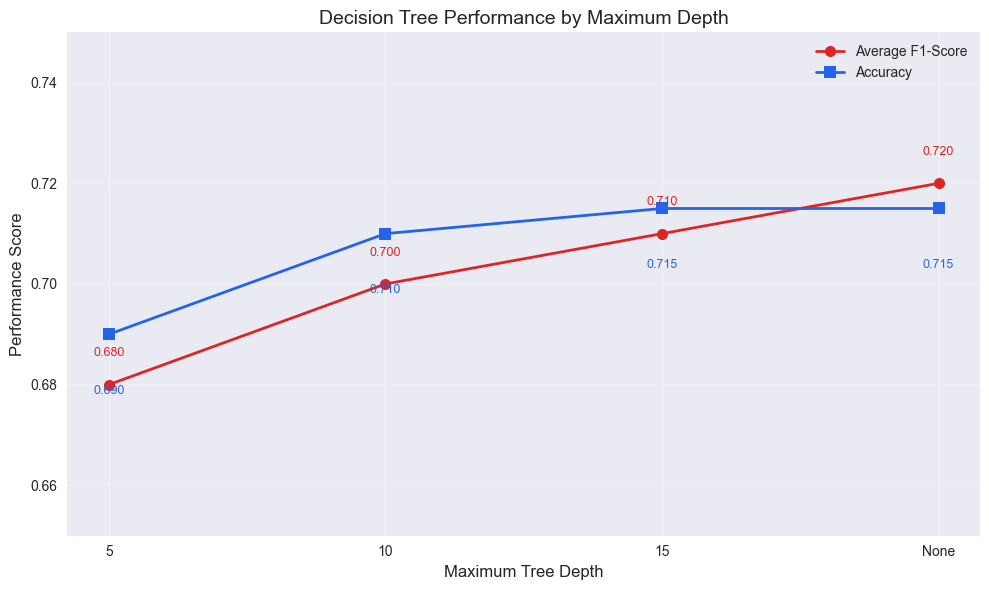

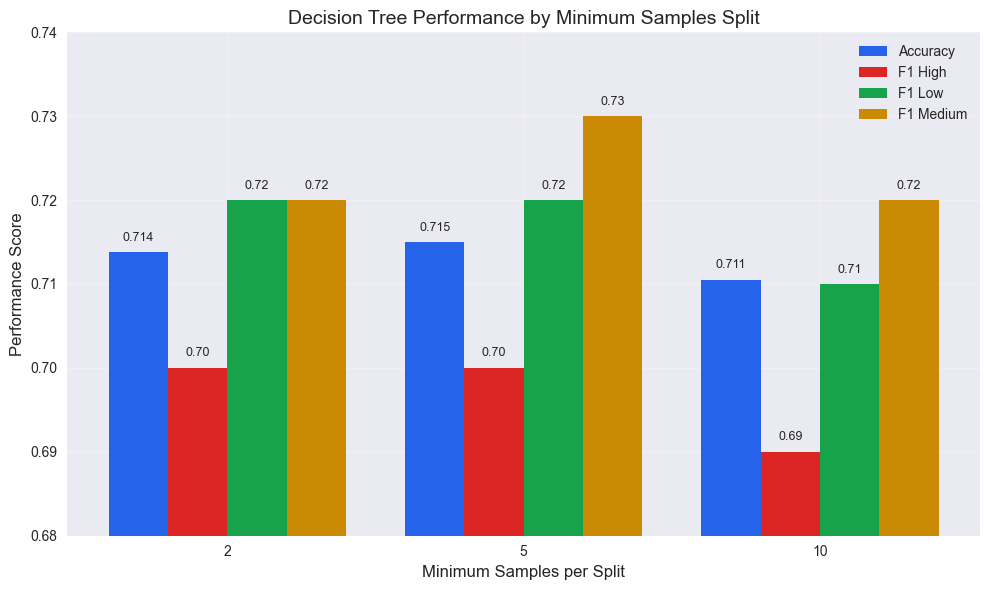

All plots saved as both PNG (300 DPI) and PDF files:
1. criterion_comparison.png/.pdf
2. max_depth_comparison.png/.pdf
3. min_samples_split_comparison.png/.pdf


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
criterion_data = {
    'Criterion': ['Gini', 'Entropy', 'Log Loss'],
    'Accuracy': [0.7049, 0.7150, 0.7150],
    'F1 High': [0.69, 0.70, 0.70],
    'F1 Low': [0.70, 0.72, 0.72],
    'F1 Medium': [0.72, 0.73, 0.73],
    'Avg F1': [0.70, 0.72, 0.72]
}

min_samples_data = {
    'Min Samples Split': [2, 5, 10],
    'Accuracy': [0.7138, 0.7150, 0.7105],
    'F1 High': [0.70, 0.70, 0.69],
    'F1 Low': [0.72, 0.72, 0.71],
    'F1 Medium': [0.72, 0.73, 0.72],
    'Avg F1': [0.71, 0.72, 0.71]
}

max_depth_data = {
    'Max Depth': ['5', '10', '15', 'None'],
    'Avg F1': [0.68, 0.70, 0.71, 0.72],
    'Accuracy': [0.69, 0.71, 0.715, 0.715]
}

df_criterion = pd.DataFrame(criterion_data)
df_min_samples = pd.DataFrame(min_samples_data)
df_max_depth = pd.DataFrame(max_depth_data)

# Plot 1: Criterion Comparison
fig1, ax1 = plt.subplots(figsize=(10, 6))
x = np.arange(len(df_criterion))
width = 0.2

ax1.bar(x - 1.5*width, df_criterion['Accuracy'], width, label='Accuracy', color='#2563eb')
ax1.bar(x - 0.5*width, df_criterion['F1 High'], width, label='F1 High', color='#dc2626')
ax1.bar(x + 0.5*width, df_criterion['F1 Low'], width, label='F1 Low', color='#16a34a')
ax1.bar(x + 1.5*width, df_criterion['F1 Medium'], width, label='F1 Medium', color='#ca8a04')

ax1.set_xlabel('Splitting Criterion', fontsize=12)
ax1.set_ylabel('Performance Score', fontsize=12)
ax1.set_title('Decision Tree Performance by Splitting Criterion', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(df_criterion['Criterion'])
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0.65, 0.75)

for i, criterion in enumerate(df_criterion['Criterion']):
    ax1.text(i - 1.5*width, df_criterion['Accuracy'][i] + 0.002, f'{df_criterion["Accuracy"][i]:.3f}', 
             ha='center', va='bottom', fontsize=9)
    ax1.text(i - 0.5*width, df_criterion['F1 High'][i] + 0.002, f'{df_criterion["F1 High"][i]:.2f}', 
             ha='center', va='bottom', fontsize=9)
    ax1.text(i + 0.5*width, df_criterion['F1 Low'][i] + 0.002, f'{df_criterion["F1 Low"][i]:.2f}', 
             ha='center', va='bottom', fontsize=9)
    ax1.text(i + 1.5*width, df_criterion['F1 Medium'][i] + 0.002, f'{df_criterion["F1 Medium"][i]:.2f}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('criterion_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig('criterion_comparison.pdf', bbox_inches='tight')
plt.show()

# Plot 2: Max Depth Impact
fig2, ax2 = plt.subplots(figsize=(10, 6))
x_depth = range(len(df_max_depth))

ax2.plot(x_depth, df_max_depth['Avg F1'], 'o-', linewidth=2, markersize=8, 
         color='#dc2626', label='Average F1-Score')
ax2.plot(x_depth, df_max_depth['Accuracy'], 's-', linewidth=2, markersize=8, 
         color='#2563eb', label='Accuracy')

ax2.set_xlabel('Maximum Tree Depth', fontsize=12)
ax2.set_ylabel('Performance Score', fontsize=12)
ax2.set_title('Decision Tree Performance by Maximum Depth', fontsize=14)
ax2.set_xticks(x_depth)
ax2.set_xticklabels(df_max_depth['Max Depth'])
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0.65, 0.75)

for i, (f1, acc) in enumerate(zip(df_max_depth['Avg F1'], df_max_depth['Accuracy'])):
    ax2.text(i, f1 + 0.005, f'{f1:.3f}', ha='center', va='bottom', fontsize=9, color='#dc2626')
    ax2.text(i, acc - 0.01, f'{acc:.3f}', ha='center', va='top', fontsize=9, color='#2563eb')

plt.tight_layout()
plt.savefig('max_depth_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig('max_depth_comparison.pdf', bbox_inches='tight')
plt.show()

# Plot 3: Min Samples Split Comparison
fig3, ax3 = plt.subplots(figsize=(10, 6))
x3 = np.arange(len(df_min_samples))

ax3.bar(x3 - 1.5*width, df_min_samples['Accuracy'], width, label='Accuracy', color='#2563eb')
ax3.bar(x3 - 0.5*width, df_min_samples['F1 High'], width, label='F1 High', color='#dc2626')
ax3.bar(x3 + 0.5*width, df_min_samples['F1 Low'], width, label='F1 Low', color='#16a34a')
ax3.bar(x3 + 1.5*width, df_min_samples['F1 Medium'], width, label='F1 Medium', color='#ca8a04')

ax3.set_xlabel('Minimum Samples per Split', fontsize=12)
ax3.set_ylabel('Performance Score', fontsize=12)
ax3.set_title('Decision Tree Performance by Minimum Samples Split', fontsize=14)
ax3.set_xticks(x3)
ax3.set_xticklabels(df_min_samples['Min Samples Split'])
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0.68, 0.74)

for i, split_val in enumerate(df_min_samples['Min Samples Split']):
    ax3.text(i - 1.5*width, df_min_samples['Accuracy'][i] + 0.001, f'{df_min_samples["Accuracy"][i]:.3f}', 
             ha='center', va='bottom', fontsize=9)
    ax3.text(i - 0.5*width, df_min_samples['F1 High'][i] + 0.001, f'{df_min_samples["F1 High"][i]:.2f}', 
             ha='center', va='bottom', fontsize=9)
    ax3.text(i + 0.5*width, df_min_samples['F1 Low'][i] + 0.001, f'{df_min_samples["F1 Low"][i]:.2f}', 
             ha='center', va='bottom', fontsize=9)
    ax3.text(i + 1.5*width, df_min_samples['F1 Medium'][i] + 0.001, f'{df_min_samples["F1 Medium"][i]:.2f}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('min_samples_split_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig('min_samples_split_comparison.pdf', bbox_inches='tight')
plt.show()

print("All plots saved as both PNG (300 DPI) and PDF files:")
print("1. criterion_comparison.png/.pdf")
print("2. max_depth_comparison.png/.pdf") 
print("3. min_samples_split_comparison.png/.pdf")

In [ ]:
# # Save the models for each fold, with (type (DT for Decision Tree), target (height, weight, age), fold number, max depth, timestamp)
# for fold_number, model in enumerate(models):
# 	timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# 	filename = f'models/DT_{params["target"]}_f#_{fold_number+1}_{params["max_depth"]}_{timestamp}.pkl'
# 	# Create directory if it doesn't exist
# 	os.makedirs('models', exist_ok=True)
# 	joblib.dump(model, filename)
# 	print(f'Model saved to {filename}')

Model saved to models/DT_height_f#_1_15_20250507_201458.pkl
Model saved to models/DT_height_f#_2_15_20250507_201458.pkl
Model saved to models/DT_height_f#_3_15_20250507_201458.pkl
Model saved to models/DT_height_f#_4_15_20250507_201458.pkl
Model saved to models/DT_height_f#_5_15_20250507_201458.pkl


In [ ]:
# # verify the model performance on test set
# test_accuracy, test_predictions, test_model, features = decision_tree_target(
# 	train, test, target=params['target'], 
# 	max_depth=params['max_depth'], 
# 	min_samples_split=params['min_samples_split']
# )

## III. Random Forest classifier model
1) height with all features
2) weight with all features
3) age with all features
4) evaluations

In [22]:
def random_forest_target(train, test, criterion='entropy', target='height', n_estimators=100, max_depth=None, min_samples_split=2):
    """
    Train a Random Forest classifier and evaluate its performance
    
    Parameters:
    -----------
    train : DataFrame
        Training dataset
    test : DataFrame
        Testing dataset
    target : str
        Target variable to predict (height, weight, or age)
    n_estimators : int
        Number of trees in the forest
    max_depth : int, optional
        Maximum depth of the trees
    min_samples_split : int, optional
        Minimum samples required to split a node
        
    Returns:
    --------
    accuracy : float
        Model accuracy on test set
    y_pred : array
        Predictions on test set
    rf : RandomForestClassifier
        Trained model
    """
    # Define features to use
    features = [
        'ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean',
        'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
        'ax_rms', 'ay_rms', 'az_rms', 'gx_rms', 'gy_rms', 'gz_rms',
        'a_max', 'a_mean', 'a_min', 'g_max', 'g_mean', 'g_min',
        'a_fft', 'g_fft', 'a_psdx', 'g_psdx',
        'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn',
        'a_entropy', 'g_entropy'
    ]
    
    # Train model with specified parameters
    rf = RandomForestClassifier(
        criterion=criterion,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42,
        n_jobs=-1  # Use all available cores
    )
    
    X_train = train[features].values
    y_train = train[target].values
    
    rf.fit(X_train, y_train)
    
    # Predict on test set
    X_test = test[features].values
    y_test = test[target].values
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Random Forest for {target} classification accuracy: {accuracy:.4f}')
    
    return accuracy, y_pred, rf, features

def visualize_feature_importance(model, feature_names, target, fold=None):
    """
    Visualize feature importance from Random Forest model
    
    Parameters:
    -----------
    model : RandomForestClassifier
        Trained Random Forest model
    feature_names : list
        List of feature names
    target : str
        Target variable being predicted
    fold : int, optional
        Current fold number for labeling
    """
    # Get feature importances
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]
    
    # Get the top 15 features
    top_n = min(15, len(feature_names))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    plt.title(f'Feature Importances for {target} Classification' + 
              (f' (Fold {fold})' if fold is not None else ''))
    
    # Create bars with error bars for standard deviation
    plt.bar(range(top_n), importances[indices[:top_n]], 
            yerr=std[indices[:top_n]], align='center',
            color='skyblue', ecolor='black')
    
    plt.xticks(range(top_n), [feature_names[i] for i in indices[:top_n]], 
               rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    
    # Save the feature importance plot
    os.makedirs('rf_feature_importance', exist_ok=True)
    fold_str = f'_fold_{fold}' if fold is not None else ''
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'rf_feature_importance/importance_{target}{fold_str}_{timestamp}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'Feature importance plot saved to {filename}')
    plt.close()
    
    return [(feature_names[i], importances[i]) for i in indices[:top_n]]

def plot_confusion_matrix(y_true, y_pred, class_names, target, fold=None):
    """
    Create and save a confusion matrix visualization
    
    Parameters:
    -----------
    y_true : array
        True labels
    y_pred : array
        Predicted labels
    class_names : list
        List of class names
    target : str
        Target variable name
    fold : int, optional
        Current fold number for labeling
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {target} Classification' + 
              (f' (Fold {fold})' if fold is not None else ''))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    
    # Save the confusion matrix
    os.makedirs('rf_confusion_matrices', exist_ok=True)
    fold_str = f'_fold_{fold}' if fold is not None else ''
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'rf_confusion_matrices/cm_{target}{fold_str}_{timestamp}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'Confusion matrix saved to {filename}')
    plt.close()

def visualize_single_tree(model, feature_names, class_names, target, tree_index=0):
    """
    Visualize a single tree from the Random Forest
    
    Parameters:
    -----------
    model : RandomForestClassifier
        Trained Random Forest model
    feature_names : list
        List of feature names
    class_names : list
        List of class names
    target : str
        Target variable being predicted
    tree_index : int
        Index of the tree to visualize
    """
    from sklearn.tree import plot_tree
    
    # Get a single tree from the forest
    tree = model.estimators_[tree_index]
    
    plt.figure(figsize=(20, 10))
    plot_tree(
        tree, 
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=8,
        max_depth=5  # Limit depth for visualization purposes
    )
    plt.title(f'Sample Tree (#{tree_index}) from Random Forest for {target} Classification')
    plt.tight_layout()
    
    # Save the tree visualization
    os.makedirs('rf_tree_samples', exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'rf_tree_samples/tree_{target}_sample_{tree_index}_{timestamp}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'Sample tree visualization saved to {filename}')
    plt.close()

def find_optimal_hyperparameters(data, target='height', cv=3):
    """
    Find optimal hyperparameters for Random Forest using GridSearchCV
    
    Parameters:
    -----------
    data : DataFrame
        Dataset to use
    target : str
        Target variable to predict
    cv : int
        Number of cross-validation folds
        
    Returns:
    --------
    best_params : dict
        Best hyperparameters found
    """
    # Define features to use
    features = [
        'ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean',
        'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
        'ax_rms', 'ay_rms', 'az_rms', 'gx_rms', 'gy_rms', 'gz_rms',
        'a_max', 'a_mean', 'a_min', 'g_max', 'g_mean', 'g_min',
        'a_fft', 'g_fft', 'a_psdx', 'g_psdx',
        'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn',
        'a_entropy', 'g_entropy'
    ]
    
    X = data[features].values
    y = data[target].values
    
    # Define parameter grid to search
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Create grid search object
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=cv,
        n_jobs=-1,
        verbose=2,
        scoring='accuracy'
    )
    
    # Perform grid search
    print(f"Finding optimal hyperparameters for {target} classification...")
    grid_search.fit(X, y)
    
    # Report best parameters
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
    
    return grid_search.best_params_

def cross_validate_random_forest(data, criterion='entropy', target='height', n_splits=5, optimize_hyperparams=False, 
                               n_estimators=100, max_depth=None, min_samples_split=2):
    """
    Perform cross-validation for Random Forest model
    
    Parameters:
    -----------
    data : DataFrame
        Dataset to use
    criterion : str
		The function to measure the quality of a split (default is 'entropy')
    target : str
        Target variable to predict
    n_splits : int
        Number of folds for cross-validation
    optimize_hyperparams : bool
        Whether to find optimal hyperparameters
    n_estimators : int
        Number of trees in the forest
    max_depth : int
        Maximum depth of the trees
    min_samples_split : int
        Minimum samples required to split a node
    """
    # Initialize k-fold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Optimize hyperparameters if requested
    if optimize_hyperparams:
        best_params = find_optimal_hyperparameters(data, target)
        n_estimators = best_params.get('n_estimators', n_estimators)
        max_depth = best_params.get('max_depth', max_depth)
        min_samples_split = best_params.get('min_samples_split', min_samples_split)
        
        print(f"Using optimized parameters: n_estimators={n_estimators}, "
              f"max_depth={max_depth}, min_samples_split={min_samples_split}")
    
    # Lists to store results
    accuracy_scores = []
    all_true_labels = []
    all_predictions = []
    models = []
    
    # Get class names for visualization
    class_names = sorted(data[target].unique())
    
    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(data)):
        print(f"\n--- Fold {fold+1}/{n_splits} ---")
        
        # Split data
        train, test = data.iloc[train_index], data.iloc[test_index]
        
        # Train and evaluate model
        accuracy, y_pred, rf, features = random_forest_target(
            train, test, criterion=criterion, 
            target=target, 
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            min_samples_split=min_samples_split
        )
        
        # Store results
        accuracy_scores.append(accuracy)
        all_true_labels.extend(test[target].values)
        all_predictions.extend(y_pred)
        models.append(rf)
        
        # Visualize feature importance
        top_features = visualize_feature_importance(rf, features, target, fold+1)
        print("\nTop feature importances:")
        for feature, importance in top_features[:10]:  # Show top 10
            print(f"{feature}: {importance:.4f}")
            
        # Visualize confusion matrix
        plot_confusion_matrix(test[target].values, y_pred, class_names, target, fold+1)
        
        # Visualize a sample tree (only for the first fold to avoid clutter)
        if fold == 0:
            visualize_single_tree(rf, features, class_names, target)
            
        # Save model for later use
        os.makedirs('rf_models', exist_ok=True)
        model_filename = f'rf_models/rf_{target}_fold_{fold+1}.joblib'
        joblib.dump(rf, model_filename)
        print(f"Model saved to {model_filename}")
    
    # Calculate mean accuracy
    mean_accuracy = np.mean(accuracy_scores)
    print(f'\nMean Accuracy across {n_splits} folds: {mean_accuracy:.4f}')
    
    # Evaluate overall model performance
    print(f"\nOverall Classification Report for {target}:")
    print(classification_report(all_true_labels, all_predictions))
    
    # Plot overall confusion matrix
    plot_confusion_matrix(all_true_labels, all_predictions, class_names, target)
    
    return mean_accuracy, models

def evaluate_feature_set_importance(data, target='height', n_splits=5):
    """
    Evaluate the importance of different feature groups
    
    Parameters:
    -----------
    data : DataFrame
        Dataset to use
    target : str
        Target variable to predict
    n_splits : int
        Number of folds for cross-validation
    """
    feature_groups = {
        'acceleration_means': ['ax_mean', 'ay_mean', 'az_mean'],
        'gyroscope_means': ['gx_mean', 'gy_mean', 'gz_mean'],
        'acceleration_variance': ['ax_var', 'ay_var', 'az_var'],
        'gyroscope_variance': ['gx_var', 'gy_var', 'gz_var'],
        'acceleration_rms': ['ax_rms', 'ay_rms', 'az_rms'],
        'gyroscope_rms': ['gx_rms', 'gy_rms', 'gz_rms'],
        'aggregate_stats': ['a_max', 'a_mean', 'a_min', 'g_max', 'g_mean', 'g_min'],
        'frequency_domain': ['a_fft', 'g_fft', 'a_psdx', 'g_psdx'],
        'distribution_stats': ['a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy']
    }
    
    # Initialize k-fold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    results = {}
    
    # Test each feature group individually
    for group_name, features in feature_groups.items():
        print(f"\n--- Testing feature group: {group_name} ---")
        
        group_accuracies = []
        
        for fold, (train_index, test_index) in enumerate(kf.split(data)):
            train, test = data.iloc[train_index], data.iloc[test_index]
            
            # Train Random Forest with only this feature group
            rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
            rf.fit(train[features].values, train[target].values)
            
            # Predict and evaluate
            y_pred = rf.predict(test[features].values)
            accuracy = accuracy_score(test[target].values, y_pred)
            group_accuracies.append(accuracy)
            
            print(f"Fold {fold+1}: Accuracy = {accuracy:.4f}")
        
        # Store average accuracy for this feature group
        mean_acc = np.mean(group_accuracies)
        results[group_name] = mean_acc
        print(f"Average accuracy with {group_name}: {mean_acc:.4f}")
    
    # Visualize feature group importance
    plt.figure(figsize=(12, 8))
    groups = list(results.keys())
    accuracies = [results[g] for g in groups]
    
    # Sort by accuracy
    sorted_indices = np.argsort(accuracies)[::-1]
    sorted_groups = [groups[i] for i in sorted_indices]
    sorted_accuracies = [accuracies[i] for i in sorted_indices]
    
    plt.barh(sorted_groups, sorted_accuracies, color='skyblue')
    plt.xlabel('Mean Accuracy')
    plt.title(f'Feature Group Importance for {target} Classification')
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save the plot
    os.makedirs('rf_feature_groups', exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'rf_feature_groups/group_importance_{target}_{timestamp}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'\nFeature group importance plot saved to {filename}')
    plt.close()
    
    return results

In [23]:
# Optional: Find optimal hyperparameters (this will take some time)
# optimize_params = True

targets = ['height', 'weight', 'age']
params = {
    'criterion': 'entropy',        # Splitting criterion for Random Forest
    'n_estimators': 100,        # Number of trees in the forest
	'max_depth': None,          # Maximum depth of the trees
	'min_samples_split': 2,     # Minimum samples required to split a node
	'target': targets[2],        # Target variable for classification
	'n_splits': 5,               # Number of folds for cross-validation
	'optimize_hyperparams': False # Whether to find optimal hyperparameters
}

# Perform cross-validation for height prediction
print(f"\n=== Cross-validation for {params['target']} classification ===")
height_accuracy, height_models = cross_validate_random_forest(
    classifyData,
    criterion=params['criterion'], 
    target=params['target'],
    n_splits=params['n_splits'],
    optimize_hyperparams=params['optimize_hyperparams'],
)

# Optional: Analyze feature group importance
print(f"\n=== Feature Group Importance Analysis for {params['target']} ===")
feature_group_results = evaluate_feature_set_importance(classifyData, target=params['target'], n_splits=params['n_splits'])

# You can repeat for weight and age if needed
# print("\n=== Weight Classification with Random Forest ===")
# weight_accuracy, weight_models = cross_validate_random_forest(
#     classifyData, target='weight', n_splits=5, optimize_hyperparams=optimize_params)
# 
# print("\n=== Age Classification with Random Forest ===")
# age_accuracy, age_models = cross_validate_random_forest(
#     classifyData, target='age', n_splits=5, optimize_hyperparams=optimize_params)


=== Cross-validation for age classification ===

--- Fold 1/5 ---
Random Forest for age classification accuracy: 0.8705
Feature importance plot saved to rf_feature_importance/importance_age_fold_1_20250525_184925.png

Top feature importances:
ay_mean: 0.0569
az_mean: 0.0480
gy_mean: 0.0442
az_rms: 0.0417
gx_mean: 0.0414
ax_mean: 0.0411
az_var: 0.0383
ay_rms: 0.0364
gx_var: 0.0353
gx_rms: 0.0344
Confusion matrix saved to rf_confusion_matrices/cm_age_fold_1_20250525_184925.png
Sample tree visualization saved to rf_tree_samples/tree_age_sample_0_20250525_184926.png
Model saved to rf_models/rf_age_fold_1.joblib

--- Fold 2/5 ---
Random Forest for age classification accuracy: 0.8691
Feature importance plot saved to rf_feature_importance/importance_age_fold_2_20250525_184945.png

Top feature importances:
ay_mean: 0.0579
az_mean: 0.0483
gy_mean: 0.0434
ax_mean: 0.0419
az_rms: 0.0416
gx_mean: 0.0411
az_var: 0.0388
ay_rms: 0.0367
gx_var: 0.0351
gx_rms: 0.0332
Confusion matrix saved to rf_confu

## IV. Hierarchical Clustering
1) height with all features
2) weight with all features
3) age with all features

In [71]:
def preprocess_data(data, feature_selection='all'):
    """
    Preprocess the data for clustering
    
    Parameters:
    -----------
    data : DataFrame
        Dataset to use
    feature_selection : str
        Which features to use ('all', 'mean', 'var', 'rms', etc.)
        
    Returns:
    --------
    X_scaled : array
        Scaled features
    features : list
        Names of selected features
    """
    # Define feature groups
    feature_groups = {
        'mean': ['ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean'],
        'var': ['ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var'],
        'rms': ['ax_rms', 'ay_rms', 'az_rms', 'gx_rms', 'gy_rms', 'gz_rms'],
        'minmax': ['a_max', 'a_mean', 'a_min', 'g_max', 'g_mean', 'g_min'],
        'frequency': ['a_fft', 'g_fft', 'a_psdx', 'g_psdx'],
        'stats': ['a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy'],
        'all': [
            'ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean',
            'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
            'ax_rms', 'ay_rms', 'az_rms', 'gx_rms', 'gy_rms', 'gz_rms',
            'a_max', 'a_mean', 'a_min', 'g_max', 'g_mean', 'g_min',
            'a_fft', 'g_fft', 'a_psdx', 'g_psdx',
            'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy'
        ]
    }
    
    # Select features
    if feature_selection in feature_groups:
        features = feature_groups[feature_selection]
    else:
        features = feature_groups['all']
    
    # Extract features
    X = data[features].values
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, features

def perform_pca(X_scaled, n_components=2):
    """
    Perform PCA for dimensionality reduction
    
    Parameters:
    -----------
    X_scaled : array
        Scaled features
    n_components : int
        Number of components to keep
        
    Returns:
    --------
    X_pca : array
        Transformed data
    pca : PCA
        PCA model
    """
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Print explained variance
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained variance by {n_components} components: {sum(explained_variance):.4f}")
    for i, var in enumerate(explained_variance):
        print(f"Component {i+1}: {var:.4f}")
    
    return X_pca, pca

def perform_tsne(X_scaled, perplexity=30, n_components=2):
    """
    Perform t-SNE for dimensionality reduction
    
    Parameters:
    -----------
    X_scaled : array
        Scaled features
    perplexity : int
        Perplexity parameter for t-SNE
    n_components : int
        Number of components
        
    Returns:
    --------
    X_tsne : array
        Transformed data
    """
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    return X_tsne

def plot_dendrogram(X_scaled, method='ward', truncate_mode='level', p=5):
    """
    Plot hierarchical clustering dendrogram
    
    Parameters:
    -----------
    X_scaled : array
        Scaled features
    method : str
        Linkage method
    truncate_mode : str
        Truncation mode
    p : int
        Parameter for truncation
    """
    # Calculate linkage
    Z = linkage(X_scaled, method=method)
    
    # Plot dendrogram
    plt.figure(figsize=(12, 8))
    dendrogram(Z, truncate_mode=truncate_mode, p=p, 
               leaf_rotation=90, leaf_font_size=8)
    plt.title(f'Hierarchical Clustering Dendrogram (Method: {method})')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.tight_layout()
    
    # Save the dendrogram
    os.makedirs('hc_dendrograms', exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'hc_dendrograms/dendrogram_{method}_{timestamp}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'Dendrogram saved to {filename}')
    plt.close()

def plot_clusters_2d(X_2d, labels, data, dimension_reduction='PCA', feature_selection='all'):
    """
    Visualize clusters in 2D
    
    Parameters:
    -----------
    X_2d : array
        2D representation of data
    labels : array
        Cluster labels
    data : DataFrame
        Original dataset with metadata
    dimension_reduction : str
        Method used for dimensionality reduction
    feature_selection : str
        Feature selection method used
    """
    plt.figure(figsize=(12, 10))
    
    # Create a colorful scatter plot
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', 
                         alpha=0.8, edgecolors='w', s=100)
    
    # Add cluster centroids
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_center = np.mean(X_2d[labels == label], axis=0)
        plt.annotate(f'Cluster {label}', 
                     xy=cluster_center, 
                     fontsize=12, fontweight='bold',
                     bbox=dict(boxstyle="round,pad=0.3", fc='white', alpha=0.7))
    
    plt.title(f'Hierarchical Clustering Visualization ({dimension_reduction}, Features: {feature_selection})')
    plt.xlabel(f'{dimension_reduction} Component 1')
    plt.ylabel(f'{dimension_reduction} Component 2')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save the visualization
    os.makedirs('hc_visualizations', exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'hc_visualizations/clusters_{dimension_reduction}_{feature_selection}_{timestamp}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'Cluster visualization saved to {filename}')
    plt.close()
    
    # Plot with additional metadata if available
    color_targets = ['height', 'weight', 'age', 'gender']
    for target in color_targets:
        if target in data.columns:
            plt.figure(figsize=(12, 10))
            scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], 
                                 c=pd.factorize(data[target])[0], 
                                 cmap='viridis', alpha=0.8, edgecolors='w', s=100)
            
            # Add a legend
            legend_elements = []
            unique_values = data[target].unique()
            for i, val in enumerate(unique_values):
                legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                              markerfacecolor=scatter.cmap(scatter.norm(i)), 
                                              markersize=10, label=str(val)))
            
            plt.legend(handles=legend_elements, title=target, loc='best')
            plt.title(f'Data Colored by {target} ({dimension_reduction}, Features: {feature_selection})')
            plt.xlabel(f'{dimension_reduction} Component 1')
            plt.ylabel(f'{dimension_reduction} Component 2')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            
            # Save the visualization
            filename = f'hc_visualizations/clusters_by_{target}_{dimension_reduction}_{feature_selection}_{timestamp}.png'
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            print(f'Cluster visualization colored by {target} saved to {filename}')
            plt.close()

def plot_clusters_3d(X_3d, labels, data, title='3D Cluster Visualization', dimension_reduction='PCA'):
    """
    Visualize clusters in 3D
    
    Parameters:
    -----------
    X_3d : array
        3D representation of data
    labels : array
        Cluster labels
    data : DataFrame
        Original dataset with metadata
    title : str
        Plot title
    dimension_reduction : str
        Dimensionality reduction method used
    """
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot
    scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], 
                         c=labels, cmap='viridis', s=70, alpha=0.8)
    
    # Add cluster centroids
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_center = np.mean(X_3d[labels == label], axis=0)
        ax.text(cluster_center[0], cluster_center[1], cluster_center[2], 
                f'Cluster {label}', fontsize=10, fontweight='bold')
    
    ax.set_title(title)
    ax.set_xlabel(f'{dimension_reduction} Component 1')
    ax.set_ylabel(f'{dimension_reduction} Component 2')
    ax.set_zlabel(f'{dimension_reduction} Component 3')
    
    # Add colorbar
    plt.colorbar(scatter, ax=ax, label='Cluster')
    plt.tight_layout()
    
    # Save the visualization
    os.makedirs('hc_visualizations', exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'hc_visualizations/clusters_3d_{dimension_reduction}_{timestamp}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'3D cluster visualization saved to {filename}')
    plt.close()

def evaluate_cluster_quality(X_scaled, labels):
    """
    Evaluate clustering quality using various metrics
    
    Parameters:
    -----------
    X_scaled : array
        Scaled features
    labels : array
        Cluster labels
        
    Returns:
    --------
    dict
        Dictionary with evaluation metrics
    """
    # Calculate silhouette score
    silhouette = silhouette_score(X_scaled, labels) if len(np.unique(labels)) > 1 else 0
    
    # Calculate Calinski-Harabasz Index
    calinski = calinski_harabasz_score(X_scaled, labels) if len(np.unique(labels)) > 1 else 0
    
    # Calculate Davies-Bouldin Index
    davies = davies_bouldin_score(X_scaled, labels) if len(np.unique(labels)) > 1 else float('inf')
    
    # Print results
    print("\nCluster Quality Evaluation:")
    print(f"Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
    print(f"Calinski-Harabasz Index: {calinski:.4f} (higher is better)")
    print(f"Davies-Bouldin Index: {davies:.4f} (lower is better)")
    
    return {
        'silhouette': silhouette,
        'calinski_harabasz': calinski,
        'davies_bouldin': davies
    }

def find_optimal_clusters(X_scaled, max_clusters=10, linkage_method='ward'):
    """
    Find optimal number of clusters using evaluation metrics
    
    Parameters:
    -----------
    X_scaled : array
        Scaled features
    max_clusters : int
        Maximum number of clusters to test
    linkage_method : str
        Linkage method for hierarchical clustering
        
    Returns:
    --------
    dict
        Dictionary with evaluation metrics for each number of clusters
    """
    results = {
        'n_clusters': [],
        'silhouette': [],
        'calinski_harabasz': [],
        'davies_bouldin': []
    }
    
    print("\nFinding optimal number of clusters...")
    for n_clusters in range(2, max_clusters + 1):
        # Create clustering model
        model = AgglomerativeClustering(
            n_clusters=n_clusters,
            linkage=linkage_method
        )
        
        # Fit model and get labels
        labels = model.fit_predict(X_scaled)
        
        # Evaluate clustering
        metrics = evaluate_cluster_quality(X_scaled, labels)
        
        # Store results
        results['n_clusters'].append(n_clusters)
        results['silhouette'].append(metrics['silhouette'])
        results['calinski_harabasz'].append(metrics['calinski_harabasz'])
        results['davies_bouldin'].append(metrics['davies_bouldin'])
        
        print(f"n_clusters = {n_clusters}: Silhouette = {metrics['silhouette']:.4f}, "
              f"CH = {metrics['calinski_harabasz']:.4f}, DB = {metrics['davies_bouldin']:.4f}")
    
    # Plot evaluation metrics
    plt.figure(figsize=(16, 12))
    
    # Silhouette score (higher is better)
    plt.subplot(3, 1, 1)
    plt.plot(results['n_clusters'], results['silhouette'], 'o-', color='blue')
    plt.axvline(results['n_clusters'][np.argmax(results['silhouette'])], color='red', linestyle='--')
    plt.title('Silhouette Score (higher is better)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')
    plt.grid(True)
    
    # Calinski-Harabasz Index (higher is better)
    plt.subplot(3, 1, 2)
    plt.plot(results['n_clusters'], results['calinski_harabasz'], 'o-', color='green')
    plt.axvline(results['n_clusters'][np.argmax(results['calinski_harabasz'])], color='red', linestyle='--')
    plt.title('Calinski-Harabasz Index (higher is better)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')
    plt.grid(True)
    
    # Davies-Bouldin Index (lower is better)
    plt.subplot(3, 1, 3)
    plt.plot(results['n_clusters'], results['davies_bouldin'], 'o-', color='purple')
    plt.axvline(results['n_clusters'][np.argmin(results['davies_bouldin'])], color='red', linestyle='--')
    plt.title('Davies-Bouldin Index (lower is better)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')
    plt.grid(True)
    
    plt.tight_layout()
    
    # Save the visualization
    os.makedirs('hc_evaluations', exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'hc_evaluations/cluster_evaluation_{linkage_method}_{timestamp}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'Cluster evaluation plot saved to {filename}')
    plt.close()
    
    # Determine optimal number of clusters
    best_silhouette = results['n_clusters'][np.argmax(results['silhouette'])]
    best_calinski = results['n_clusters'][np.argmax(results['calinski_harabasz'])]
    best_davies = results['n_clusters'][np.argmin(results['davies_bouldin'])]
    
    print(f"\nOptimal number of clusters:")
    print(f"Based on Silhouette Score: {best_silhouette}")
    print(f"Based on Calinski-Harabasz Index: {best_calinski}")
    print(f"Based on Davies-Bouldin Index: {best_davies}")
    
    return results

def analyze_cluster_characteristics(data, labels, features):
    """
    Analyze characteristics of each cluster
    
    Parameters:
    -----------
    data : DataFrame
        Original dataset
    labels : array
        Cluster labels
    features : list
        Names of features used for clustering
        
    Returns:
    --------
    DataFrame
        Cluster characteristics
    """
    # Add cluster labels to the original data
    data_with_clusters = data.copy()
    data_with_clusters['cluster'] = labels
    
    # Calculate cluster statistics
    cluster_stats = []
    
    # For each cluster
    for cluster_id in sorted(np.unique(labels)):
        # Get data for this cluster
        cluster_data = data_with_clusters[data_with_clusters['cluster'] == cluster_id]
        
        # Calculate statistics for numerical features
        cluster_means = cluster_data[features].mean()
        global_means = data[features].mean()
        
        # Calculate how much each feature differs from the global mean
        diff_from_global = (cluster_means - global_means) / global_means * 100
        
        # Find the top differentiating features (both positive and negative)
        top_features = diff_from_global.abs().nlargest(5)
        
        # Create a description of the cluster
        description = [f"Cluster {cluster_id} (n={len(cluster_data)})"]
        for feature in top_features.index:
            direction = "higher" if diff_from_global[feature] > 0 else "lower"
            description.append(f"  - {feature}: {abs(diff_from_global[feature]):.2f}% {direction} than average")
        
        # Check for categorical/demographic patterns if available
        categorical_cols = ['gender', 'age', 'height', 'weight', 'handedness', 'holdRacketHanded', 'playYears', 'testmode', 'teststage']
        for col in categorical_cols:
            if col in data_with_clusters.columns:
                if data_with_clusters[col].nunique() < 10:  # Only for truly categorical variables
                    # Get distribution within this cluster
                    value_counts = cluster_data[col].value_counts(normalize=True) * 100
                    global_counts = data_with_clusters[col].value_counts(normalize=True) * 100
                    
                    # Find significant differences
                    for val in value_counts.index:
                        diff = value_counts.get(val, 0) - global_counts.get(val, 0)
                        if abs(diff) > 10:  # Only report significant differences (>10%)
                            direction = "higher" if diff > 0 else "lower"
                            description.append(f"  - {col}={val}: {abs(diff):.1f}% {direction} representation")
        
        cluster_stats.append("\n".join(description))
    
    # Print cluster characteristics
    print("\nCluster Characteristics:")
    for stat in cluster_stats:
        print(stat)
        print("-" * 40)
    
    # Create cluster profile dataframe
    profile_df = pd.DataFrame(index=sorted(np.unique(labels)))
    
    # For each numerical feature, calculate the mean within each cluster
    for feature in features:
        profile_df[feature] = [data_with_clusters[data_with_clusters['cluster'] == c][feature].mean() for c in profile_df.index]
    
    # Calculate cluster sizes
    profile_df['size'] = [sum(labels == c) for c in profile_df.index]
    profile_df['percentage'] = profile_df['size'] / len(labels) * 100
    
    return profile_df

def perform_hierarchical_clustering(data, feature_selection='all', n_clusters=None, linkage_method='ward'):
    """
    Perform hierarchical clustering with comprehensive analysis
    
    Parameters:
    -----------
    data : DataFrame
        Dataset for clustering
    feature_selection : str
        Which features to use
    n_clusters : int or None
        Number of clusters (None for automatic determination)
    linkage_method : str
        Linkage method for hierarchical clustering
        
    Returns:
    --------
    dict
        Results of clustering analysis
    """
    print(f"\n{'='*50}")
    print(f"Hierarchical Clustering Analysis (Features: {feature_selection}, Method: {linkage_method})")
    print(f"{'='*50}")
    
    # Preprocess data
    X_scaled, features = preprocess_data(data, feature_selection)
    print(f"Preprocessing complete. Selected {len(features)} features.")
    
    # Visualize dendrogram to help determine number of clusters
    plot_dendrogram(X_scaled, method=linkage_method)
    
    # Find optimal number of clusters if not specified
    if n_clusters is None:
        evaluation_results = find_optimal_clusters(X_scaled, max_clusters=10, linkage_method=linkage_method)
        
        # Use silhouette score as the primary metric for automatic determination
        n_clusters = evaluation_results['n_clusters'][np.argmax(evaluation_results['silhouette'])]
        print(f"\nAutomatically selected {n_clusters} clusters based on silhouette score.")
    
    # Create and fit the clustering model
    model = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage=linkage_method
    )
    labels = model.fit_predict(X_scaled)
    print(f"Hierarchical clustering complete with {n_clusters} clusters.")
    
    # Evaluate the clustering
    metrics = evaluate_cluster_quality(X_scaled, labels)
    
    # Perform dimensionality reduction for visualization
    # PCA for 2D visualization
    X_pca_2d, pca_2d = perform_pca(X_scaled, n_components=2)
    plot_clusters_2d(X_pca_2d, labels, data, dimension_reduction='PCA', feature_selection=feature_selection)
    
    # PCA for 3D visualization
    X_pca_3d, pca_3d = perform_pca(X_scaled, n_components=3)
    plot_clusters_3d(X_pca_3d, labels, data, title=f'3D PCA Clustering (Features: {feature_selection}, Method: {linkage_method})', dimension_reduction='PCA')
    
    # t-SNE for alternative visualization
    X_tsne_2d = perform_tsne(X_scaled, perplexity=min(30, len(X_scaled) // 5), n_components=2)
    plot_clusters_2d(X_tsne_2d, labels, data, dimension_reduction='t-SNE', feature_selection=feature_selection)
    
    # Analyze cluster characteristics
    cluster_profile = analyze_cluster_characteristics(data, labels, features)
    
    # Return results
    return {
        'model': model,
        'labels': labels,
        'metrics': metrics,
        'X_scaled': X_scaled,
        'features': features,
        'X_pca_2d': X_pca_2d,
        'X_pca_3d': X_pca_3d,
        'X_tsne_2d': X_tsne_2d,
        'cluster_profile': cluster_profile
    }

In [87]:
# Check if data file exists
# data_file = 'tennis_player_motion_data.csv'
# if not os.path.exists(data_file):
# 	print(f"Error: Data file '{data_file}' not found.")
# 	return

# # Load data
# print("Loading tennis player motion data...")
# data = pd.read_csv(data_file)
# print(f"Data loaded: {data.shape[0]} rows, {data.shape[1]} columns")

# # Display basic info
# print("\nData overview:")
# print(data.head())
# print("\nColumn types:")
# print(data.dtypes)

# # Convert categorical columns to appropriate type
# categorical_cols = ['gender', 'age', 'height', 'weight', 'handedness', 'holdRacketHanded', 'playYears']
# for col in categorical_cols:
# 	if col in data.columns:
# 		data[col] = data[col].astype('category')

# Run clustering with different feature sets
feature_sets = ['all']
linkage_methods = ['ward'] #, 'complete', 'average']
# ward is the default method for hierarchical clustering, complete and average are alternatives

best_results = None
best_silhouette = -1

# Create results directory
os.makedirs('results', exist_ok=True)

# Run comprehensive analysis
for feature_set in feature_sets:
	for method in linkage_methods:
		# Run hierarchical clustering
		results = perform_hierarchical_clustering(cleanedData, feature_selection=feature_set, linkage_method=method)
		
		# Track best results
		if results['metrics']['silhouette'] > best_silhouette:
			best_silhouette = results['metrics']['silhouette']
			best_results = {
				'feature_set': feature_set,
				'linkage_method': method,
				'n_clusters': len(np.unique(results['labels'])),
				'silhouette': results['metrics']['silhouette']
			}

# Print best configuration
print("\n" + "="*50)
print("Best Clustering Configuration:")
print(f"Features: {best_results['feature_set']}")
print(f"Linkage Method: {best_results['linkage_method']}")
print(f"Number of Clusters: {best_results['n_clusters']}")
print(f"Silhouette Score: {best_results['silhouette']:.4f}")
print("="*50)

# Save results to file
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
summary_file = f'results/clustering_summary_{timestamp}.txt'
with open(summary_file, 'w') as f:
	f.write("HIERARCHICAL CLUSTERING ANALYSIS SUMMARY\n")
	f.write(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
	f.write("Best Configuration:\n")
	for key, value in best_results.items():
		f.write(f"{key}: {value}\n")

print(f"\nResults summary saved to {summary_file}")
print("\nAnalysis complete!")


Hierarchical Clustering Analysis (Features: all, Method: ward)
Preprocessing complete. Selected 34 features.


MemoryError: unable to allocate array data.

In [86]:
#MemoryError: Unable to allocate 35.3 GiB for an array with shape (4738462575,) and data type float64

# free up memory
import gc
gc.collect()

os.system('clear')  # Clear the console (Linux/Mac)

1

## III. Neural network models
1) height with all features
2) weight with all features
3) age with all features
4) evaluations